# Truth Discovery example

## Continuous Versions

### DF-QuAD

In [2]:
import sys
sys.path.append("../")

from BAG import BAG
#### Import in BAG for Argument neeeds changing to BAG.Argument to run the reproduction

from semantics import QuadraticEnergyModel
from algorithms import RK4

# from plotting import strengthplot
from matplotlib import pyplot as plt

class ProductAggregation_ws:
    def __init__(self) -> None:
        pass

    def aggregate_strength(self, attackers, supporters, state):
        support_value = 1
        for a in attackers:
            support_value *= 1-state[a]

        attack_value = 1
        for s in supporters:
            attack_value *= 1-state[s]

        return support_value - attack_value

    def __str__(self) -> str:
        return __class__.__name__


def strengthplot(model, delta, epsilon, title="Untitled graph"):

    if (type(delta) != float and type(delta) != int):
        raise TypeError("delta must be a float or integer")

    if (type(epsilon) != float and type(epsilon) != int):
        raise TypeError("epsilon must be a float or integer")

    fig, ax = plt.subplots()
    graph_data = model.approximator.graph_data if hasattr(model, 'approximator') else model.graph_data
    for x in graph_data:
        x_values = [x[0] for x in graph_data[x]]
        y_values = [y[1] for y in graph_data[x]]
        ax.plot(x_values, y_values, label=x)

    ax.set_xlabel('Time (t)')  # Add an x-label to the axes.
    ax.set_ylabel('Strength (t)')  # Add a y-label to the axes.
    ax.set_title(title)  # Add a title to the axes.
    ax.legend()  # Add a legend.

    return plt

ContinuousModularModel, RK4
Time: 9.89999999999998
Argument(name=s1, weight=0.5, strength=0.9999118366275332)
Argument(name=s2, weight=0.5, strength=0.9999118366275332)
Argument(name=s3, weight=0.5, strength=0.998887713004957)
Argument(name=s4, weight=0.5, strength=0.998887713004957)
Argument(name=y58, weight=0.0, strength=0.9995751937627928)
Argument(name=y62, weight=0.0, strength=4.1288298317965045e-05)
Argument(name=pb, weight=0.0, strength=4.1288298317965045e-05)
Argument(name=pl, weight=0.0, strength=0.9995751937627928)



<module 'matplotlib.pyplot' from '/vol/bitbucket/fr920/envs/gradaba/lib/python3.10/site-packages/matplotlib/pyplot.py'>

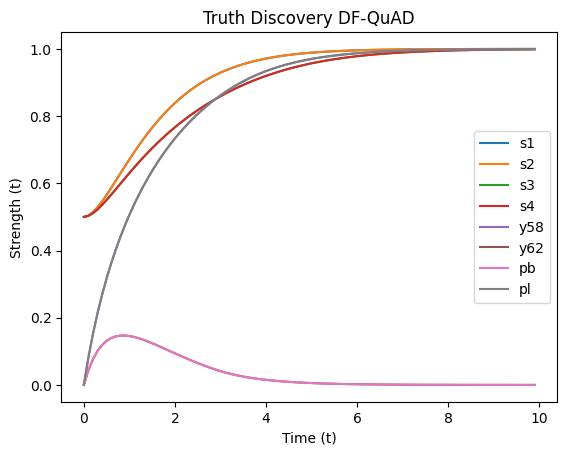

In [3]:
from semantics import modular
from semantics.ContinuousModularModel import ContinuousModularModel
# Iterative computation
model = ContinuousModularModel(ProductAggregation_ws(),  modular.LinearInfluence(conservativeness=1))
model.BAG = BAG("truth_disco.bag")
model.approximator = RK4(model)

DELTA = 10e-2
EPSILON = 10e-4
model.solve(delta=DELTA, epsilon=EPSILON, verbose=True, generate_plot=True)

# for arg in model.BAG.arguments.values():
#     print((arg.name,arg.strength))

strengthplot(model, DELTA, EPSILON, "Truth Discovery DF-QuAD")

### Quadratic Energy

QuadraticEnergyModel, RK4
Time: 8.899999999999984
Argument(name=s1, weight=0.5, strength=0.8721688605431386)
Argument(name=s2, weight=0.5, strength=0.8721688605431386)
Argument(name=s3, weight=0.5, strength=0.7107620242585438)
Argument(name=s4, weight=0.5, strength=0.7107620242585438)
Argument(name=y58, weight=0.0, strength=0.8567572483683447)
Argument(name=y62, weight=0.0, strength=1.3518439360774931e-05)
Argument(name=pb, weight=0.0, strength=1.3518439360774931e-05)
Argument(name=pl, weight=0.0, strength=0.8567572483683447)



<module 'matplotlib.pyplot' from '/vol/bitbucket/fr920/envs/gradaba/lib/python3.10/site-packages/matplotlib/pyplot.py'>

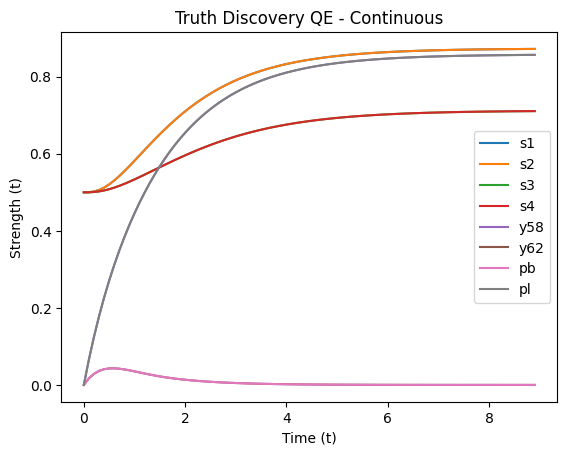

In [4]:
#from uncertainpy.argumentation.graphing import graph

model = QuadraticEnergyModel()
model.approximator = RK4(model)
model.BAG = BAG("truth_disco.bag")

DELTA = 10e-2
EPSILON = 10e-4

model.solve(delta=DELTA, epsilon=EPSILON, verbose=True, generate_plot=True)
strengthplot(model, DELTA, EPSILON, "Truth Discovery QE - Continuous")

## Discrete Versions

### Df-QuAD

<module 'matplotlib.pyplot' from '/vol/bitbucket/fr920/envs/gradaba/lib/python3.10/site-packages/matplotlib/pyplot.py'>

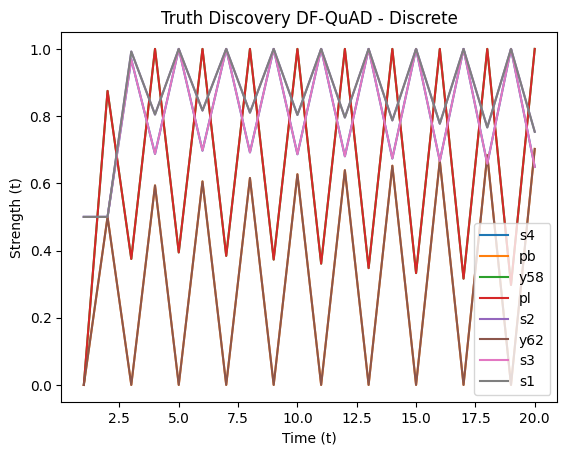

In [5]:
import sys
sys.path.append("../")

from BAG import BAG

# from plotting import strengthplot

from BSAF import BSAF
from BSAF.Argument import Argument
from ABAF.Assumption import Assumption
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.EulerBasedInfluence import EulerBasedInfluence
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular.SetSumAggregation import SetSumAggregation



bag = BAG("truth_disco.bag")


### Create the BSAF from the BAG

## define assumptions from the arguments keys and initial strengths
assumptions = [Assumption(arg) for arg in bag.arguments]

## retrieve the initial strengths from the arguments
for asm in assumptions:
    asm.initial_weight = bag.arguments[asm.name].strength

bsaf_args = [Argument(name=arg) for arg in bag.arguments]
for arg in bsaf_args:
    ## set the initial strength of the argument
    arg.initial_weight = bag.arguments[arg.name].strength

### Define the BSAF
bsaf = BSAF(bsaf_args, assumptions)

for sup in bag.supports:
    ## check that the support is coming from only one assumption
    if sup.supporter.name in [asm.name for asm in assumptions]:
        ## get the argument from the BSAF
        suptr = [arg for arg in bsaf.arguments if arg.name == sup.supporter.name]
        suptd = [arg for arg in bsaf.arguments if arg.name == sup.supported.name][0]
        ## add the support to the BSAF
        bsaf.add_support(suptr, suptd)
        # print(f"Support from {suptd.name} to {suptr[0].name}")
    else:
        print("Support is not coming from only one assumption")

for att in bag.attacks:
    ## check that the attack is coming from only one assumption
    if att.attacker.name in [asm.name for asm in assumptions]:
        ## get the argument from the BSAF
        attr = [arg for arg in bsaf.arguments if arg.name == att.attacker.name]
        attd = [arg for arg in bsaf.arguments if arg.name == att.attacked.name][0]
        ## add the attack to the BSAF
        bsaf.add_attack(attr, attd)
        # print(f"Attack from {attd.name} to {attr[0].name}")
    else:
        print("Attack is not coming from only one assumption")


model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(), 
                        influence=LinearInfluence(conservativeness=1), 
                        set_aggregation=SetSumAggregation())

model.solve(20, generate_plot=True)

strengthplot(model, 1, 1, "Truth Discovery DF-QuAD - Discrete")

### Does it converge if we consider acyclic frameworks?

## Flat ABA - should converge all
## Convergence of random instances 
## How many outer loops until we get stuck in the inner loop?


### QE

<module 'matplotlib.pyplot' from '/vol/bitbucket/fr920/envs/gradaba/lib/python3.10/site-packages/matplotlib/pyplot.py'>

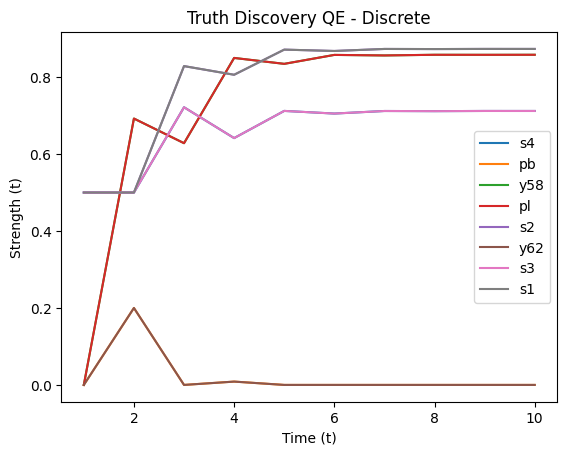

In [6]:
# print(bsaf)

from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence

model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(), 
                        influence=QuadraticMaximumInfluence(conservativeness=1), 
                        set_aggregation=SetSumAggregation())

model2.solve(10, generate_plot=True)

strengthplot(model2, 1, 1, "Truth Discovery QE - Discrete")

# Random ICCMA example

ABAF(Assumptions=[a0,a1,a2,a3,a4,a5,a6,a7], Rules=[r1[0.5]: s8 :- a0, a1, a6.,r2[0.5]: s8 :- a1.,r3[0.5]: s8 :- a5, a3, a1.,r4[0.5]: s8 :- a5, a3.,r5[0.5]: s7 :- a0.,r6[0.5]: s12 :- a5, a3, a6.,r7[0.5]: s12 :- a2, a6, a7, a4, a1.,r8[0.5]: s12 :- a2, a0, a6, s7, a1.,r9[0.5]: s3 :- a4.,r10[0.5]: s3 :- a1.,r11[0.5]: s3 :- a2, a1, a0.,r12[0.5]: s5 :- a3.,r13[0.5]: s5 :- a3, a0, s7, a7, a1.,r14[0.5]: s16 :- a0, a3, s7, a5.,r15[0.5]: s16 :- a7, a2, s7, a5.,r16[0.5]: s16 :- s12, s5.,r17[0.5]: s14 :- a7.,r18[0.5]: s6 :- a5, s16.,r19[0.5]: s6 :- s8, a0, a5, a7, s16.,r20[0.5]: s11 :- a7, a6, s6, s7.,r21[0.5]: s11 :- a5.,r22[0.5]: s11 :- s3, s16.,r23[0.5]: s2 :- s8, a1.,r24[0.5]: s2 :- s12, a4.,r25[0.5]: s2 :- a7, s12, a1, a0.,r26[0.5]: s2 :- a3, a0, a5, s14, s5.,r27[0.5]: s10 :- s12, a3, a4, a0.,r28[0.5]: s10 :- a0, s6.,r29[0.5]: s10 :- a5, s12.,r30[0.5]: s10 :- a3, s14, a7, a4, s16.,r31[0.5]: s10 :- a7.,r32[0.5]: s4 :- s6.,r33[0.5]: s4 :- s16.,r34[0.5]: s0 :- a0, a6.,r35[0.5]: s0 :- s12.,r36[0.

Analysing rules:   0%|          | 0/50 [00:00<?, ?it/s]

Analysing rules: 100%|██████████| 50/50 [00:00<00:00, 1700.98it/s]


0.22s to build 547 arguments

Support: {a0} -> a0 
Support: {a2,a3,a6} -> a1 
Support: {a2,a3,a5,a6,a7} -> a1 
Support: {a0,a2,a3,a5,a6} -> a1 
Support: {a0,a1,a2,a3,a4,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a5,a6} -> a1 
Support: {a1} -> a1 
Support: {a0,a3,a5,a7} -> a1 
Support: {a0,a1,a2,a3,a5,a7} -> a1 
Support: {a3,a5,a6,a7} -> a1 
Support: {a0,a3,a5} -> a1 
Support: {a0,a1,a2,a4,a5,a6,a7} -> a1 
Support: {a3,a5,a6} -> a1 
Support: {a0,a1,a2,a3,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a3,a4,a5,a6,a7} -> a1 
Support: {a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a2,a3,a6} -> a1 
Support: {a0,a3,a5,a6} -> a1 
Support: {a0,a2,a3,a6,a7} -> a1 
Support: {a0,a1,a2,a5,a7} -> a1 
Support: {a3,a4,a5,a6,a7} -> a1 
Support: {a0,a2,a5,a6,a7} -> a1 
Support: {a1,a2,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a5,a6,a7} -> a1 
Support: {a0,a2,a5,a7} -> a1 
Support: {a1,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a3,a5,a6,a7} -> a1 
Support: {a0,

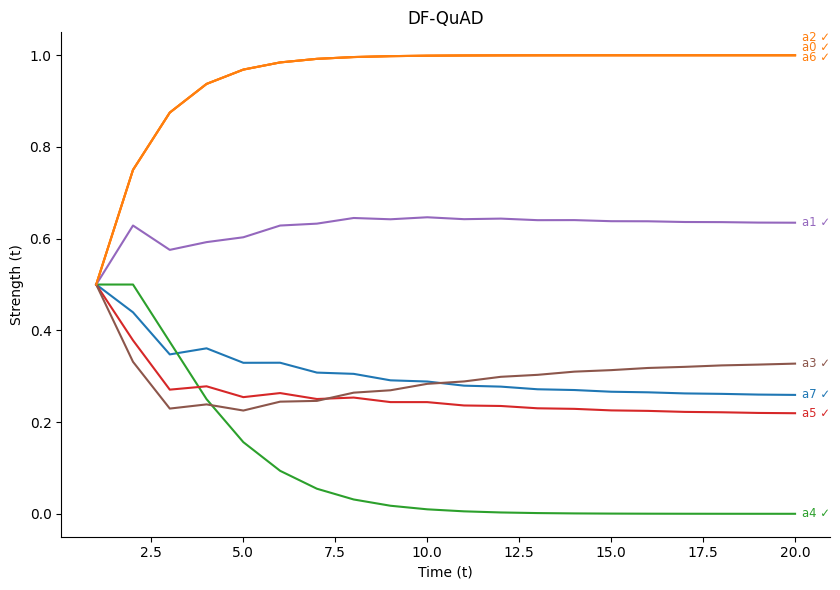

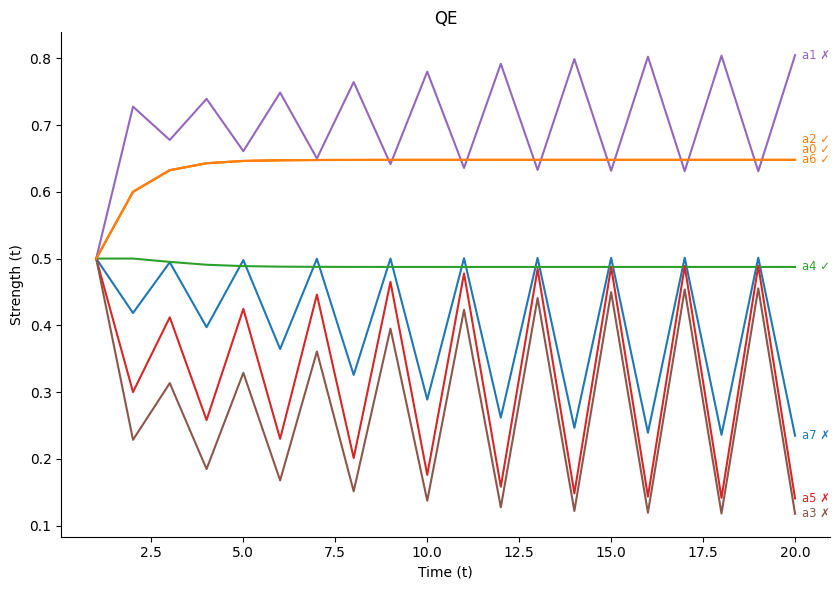

In [7]:
import sys
sys.path.append("../")

from BAG import BAG

from plotting import strengthplot

from ABAF import ABAF
from ABAF.Assumption import Assumption
from BSAF import BSAF
from BSAF.Argument import Argument
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.EulerBasedInfluence import EulerBasedInfluence
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular.SetSumAggregation import SetSumAggregation
from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence


## Load ICCMA example
abaf = ABAF(path="/vol/bitbucket/fr920/dependency-graph-alternative/input_data_nf/non_flat_1_s25_c0.02_n0.2_a0.3_r5_b5_1.aba")
# abaf = ABAF(path="ABA_ICCMA_input.iccma")

DELTA = 5
EPSILON = 1e-2

print(abaf)

print(f"Number of Assumptions: {len(abaf.assumptions)}")
print(f"Number of Rules: {len(abaf.rules)}")

bsaf = abaf.to_bsaf()

print(bsaf)

model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(), 
                        influence=LinearInfluence(conservativeness=1), 
                        set_aggregation=SetProductAggregation())

model.solve(20, generate_plot=True, verbose=True)

strengthplot(model, delta=DELTA, epsilon=EPSILON,
             title="DF-QuAD", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model.has_converged(epsilon=1e-2, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")


model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(), 
                        influence=QuadraticMaximumInfluence(conservativeness=1), 
                        set_aggregation=SetProductAggregation())

model2.solve(20, generate_plot=True, verbose=True)

strengthplot(model2, delta=DELTA, epsilon=EPSILON,
             title="QE", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model2.has_converged(epsilon=EPSILON, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model2.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")


# Convergence Experiments

## Check Runs and Completions

In [ ]:
from pathlib import Path
import re

# 1) Point to your aba folder and gather all file paths
folder_path = Path("../data_generation/abaf/")
aba_files = sorted(folder_path.glob("*.aba"))
print(f"Total ABAF files in folder: {len(aba_files)}")

# 2) We’ll parse each .aba using its native format: lines starting with "a ", "c ", "r "
#    - "a X"  declares assumption X
#    - "r <idx> H B1 B2 ..." declares a rule with head H and body B1,B2,...
flat_files = []
nonflat_files = []
# 3) For each file, check flatness using the ABAF loader format
for path in aba_files:
    lines = path.read_text().splitlines()
    # collect assumption names
    assumptions = {parts[1] for line in lines if line.startswith("a ")
                   for parts in [line.split()]}

    # detect any rule whose head is an assumption
    nonflat = False
    nonflat_rule = 0
    for line in lines:
        if not line.startswith("r "):  # skip non-rule lines
            continue
        parts = line.split()
        # parts[0] == 'r', parts[1] == rule-id, so head is parts[2]
        if len(parts) < 2:
            continue
        head = parts[1]
        if head in assumptions:
            nonflat = True
            nonflat_rule += 1

    if nonflat:
        nonflat_files.append((path.name,nonflat_rule))
    else:
        flat_files.append((path.name,nonflat_rule))

# 4) Print proportions
total = len(aba_files)
f = len(flat_files)
nf = len(nonflat_files)
avg_nf_rule = sum(nf for _,nf in nonflat_files) / len(nonflat_files) if nonflat_files else 0
## sanity check
avg_nf_rule_flat = sum(nf for _,nf in flat_files) / len(flat_files) if flat_files else 0

print(f"Flat files:     {f} ({f/total:.1%}), avg {avg_nf_rule_flat:.1f} rules")
print(f"Non-flat files: {nf} ({nf/total:.1%}), avg {avg_nf_rule:.1f} rules")

# 5) Optionally print some examples
print("\nExample flat:", flat_files[:5])
print("Example non-flat:", nonflat_files[:5])

### print last 5 files
print("\nLast 5 flat files:")
for fname, n in flat_files[-5:]:
    print(f"  {fname} ({n} rules)")
print("\nLast 5 non-flat files:")
for fname, n in nonflat_files[-5:]:
    print(f"  {fname} ({n} rules)")


Total ABAF files in folder: 1440
Flat files:     480 (33.3%), avg 0.0 rules
Non-flat files: 960 (66.7%), avg 7.1 rules

Example flat: [('nf_atm_s20_n0.01_a0.5_r2_b16_0.aba', 0), ('nf_atm_s20_n0.01_a0.5_r2_b16_1.aba', 0), ('nf_atm_s20_n0.01_a0.5_r2_b16_2.aba', 0), ('nf_atm_s20_n0.01_a0.5_r2_b16_3.aba', 0), ('nf_atm_s20_n0.01_a0.5_r2_b16_4.aba', 0)]
Example non-flat: [('nf_atm_s20_n0.1_a0.5_r2_b16_0.aba', 2), ('nf_atm_s20_n0.1_a0.5_r2_b16_1.aba', 1), ('nf_atm_s20_n0.1_a0.5_r2_b16_2.aba', 1), ('nf_atm_s20_n0.1_a0.5_r2_b16_3.aba', 2), ('nf_atm_s20_n0.1_a0.5_r2_b16_4.aba', 2)]

Last 5 flat files:
  nf_atm_s60_n0.01_a0.5_r8_b8_5.aba (0 rules)
  nf_atm_s60_n0.01_a0.5_r8_b8_6.aba (0 rules)
  nf_atm_s60_n0.01_a0.5_r8_b8_7.aba (0 rules)
  nf_atm_s60_n0.01_a0.5_r8_b8_8.aba (0 rules)
  nf_atm_s60_n0.01_a0.5_r8_b8_9.aba (0 rules)

Last 5 non-flat files:
  nf_atm_s60_n0.2_a0.5_r8_b8_5.aba (25 rules)
  nf_atm_s60_n0.2_a0.5_r8_b8_6.aba (23 rules)
  nf_atm_s60_n0.2_a0.5_r8_b8_7.aba (21 rules)
  nf_atm_

In [19]:
import pickle
import pandas as pd

# 1) Load your previously‐computed results
with open("../convergence_results_to10m_nf_atm_e2_d5_s50.pkl", "rb") as pf:
    runs = pickle.load(pf)
# count total number of runs and files
print(f"Total runs: {len(runs)}")
print(f"Total files ran: {len(set(r['file'] for r in runs))}")
# 2) Identify flat runs correctly
# filter runs whose 'non_flat' flag is False (or missing)
flat_runs = [r for r in runs if not r.get('non_flat')]
nonflat_runs = [r for r in runs if r.get('non_flat')]
# count how many unique flat files
unique_flat_files = set(r['file'] for r in flat_runs)
print(f"Flat files: {len(unique_flat_files)} unique — total flat runs: {len(flat_runs)} (two models per file)")
# count how many unique non-flat files
unique_nonflat_files = set(r['file'] for r in nonflat_runs)
print(f"Non-flat files: {len(unique_nonflat_files)} unique — total non-flat runs: {len(nonflat_runs)} (two models per file)")


def summarize(df_in, name):
    """
    Print stats for completed vs timed-out runs separately.
    """
    # Build DataFrame with relevant columns
    cols = ["s", "n", "r", "b", "timeout"]
    df = pd.DataFrame(df_in)
    df = df[[c for c in cols if c in df.columns]]

    # split
    done = df[df["timeout"] == False] if "timeout" in df.columns else df
    timed = df[df["timeout"] == True] if "timeout" in df.columns else df.iloc[0:0]

    def print_stats(subset, label):
        print(f"--- {label} (count={len(subset)}) ---")
        for col in ["s", "n", "r", "b"]:
            if col not in subset.columns or subset[col].dropna().empty:
                continue
            vals = subset[col].dropna().astype(float)
            print(
                f"{col:>6s}: "
                f"min={vals.min()}, max={vals.max()}, "
                f"mean={vals.mean():.1f}, median={vals.median():.1f}"
            )
    # print in order: completed first, then timed out
    print_stats(done,  f"{name} — Completed")
    print_stats(timed, f"{name} — Timed out")

# 6) Print summaries
print("=== Flat runs ===")
print(f"Total flat runs: {len(flat_runs)}")
summarize(flat_runs, "Flat runs")

print("=== Non-flat runs ===")
print(f"Total non-flat runs: {len(nonflat_runs)}")
summarize(nonflat_runs,   "Non-flat runs")

# 7) Sanity checks: all flat should complete, all non-flat should timeout
flat_done = [r for r in flat_runs if not r.get("timeout", False)]
flat_to   = [r for r in flat_runs if     r.get("timeout", False)]
nonflat_done = [r for r in nonflat_runs if not r.get("timeout", False)]
nonflat_to   = [r for r in nonflat_runs if     r.get("timeout", False)]

print("=== Sanity checks ===")
print(f"All flat timed out?       {len(flat_to)==len(flat_runs)} (completed: {len(flat_done)}, timeouts: {len(flat_to)})")
print(f"All non-flat completed?   {len(nonflat_done)==len(nonflat_runs)} (completed: {len(nonflat_done)}, timeouts: {len(nonflat_to)})")


print("\nOutcome by flatness:")
print(f" Flat:     completed={done_f} ({pct([r for r in flat_runs if not r['timeout']], len(flat_runs))}), "
      f"timeouts={to_f} ({pct([r for r in flat_runs if r['timeout']], len(flat_runs))})")
print(f" Non-flat: completed={done_nf} ({pct([r for r in nonflat_runs if not r['timeout']], len(nonflat_runs))}), "
      f"timeouts={to_nf} ({pct([r for r in nonflat_runs if r['timeout']], len(nonflat_runs))})")


Total runs: 2880
Total files ran: 1440
Flat files: 480 unique — total flat runs: 960 (two models per file)
Non-flat files: 960 unique — total non-flat runs: 1920 (two models per file)
=== Flat runs ===
Total flat runs: 960
--- Flat runs — Completed (count=960) ---
     s: min=20.0, max=60.0, mean=35.0, median=30.0
     n: min=0.01, max=0.05, mean=0.0, median=0.0
     r: min=2.0, max=8.0, mean=4.7, median=4.0
     b: min=2.0, max=16.0, mean=7.5, median=6.0
--- Flat runs — Timed out (count=0) ---
=== Non-flat runs ===
Total non-flat runs: 1920
--- Non-flat runs — Completed (count=1736) ---
     s: min=20.0, max=60.0, mean=41.3, median=40.0
     n: min=0.05, max=0.2, mean=0.1, median=0.1
     r: min=2.0, max=8.0, mean=4.5, median=4.0
     b: min=2.0, max=16.0, mean=7.1, median=4.0
--- Non-flat runs — Timed out (count=184) ---
     s: min=40.0, max=60.0, mean=53.9, median=60.0
     n: min=0.1, max=0.2, mean=0.2, median=0.2
     r: min=2.0, max=8.0, mean=6.4, median=8.0
     b: min=2.0, max

In [16]:
import pickle
from collections import Counter

# 1) Load the results list
with open("../convergence_results_to10m_nf_atm_e2_d5_s50.pkl", "rb") as pf:
    results = pickle.load(pf)

# 2) Build a counter over (file, model) pairs
pair_counts = Counter((r["file"], r["model"]) for r in results)

# 3) Find duplicates (count > 1)
dups = {pair: cnt for pair, cnt in pair_counts.items() if cnt > 1}

# 4) Report
if not dups:
    print("✅ No duplicate (file,model) entries found.")
else:
    print("⚠️  Found duplicates for these (file, model) keys:")
    for (fname, model), cnt in sorted(dups.items()):
        print(f"  {fname!r}, {model!r} appears {cnt} times")

# 5) (Optional) filter out duplicates and rebuild a deduped list
deduped = []
seen = set()
for r in results:
    key = (r["file"], r["model"])
    if key not in seen:
        deduped.append(r)
        seen.add(key)

print(f"\ncacheinal runs: {len(results)}, deduped runs: {len(deduped)}")


✅ No duplicate (file,model) entries found.

cacheinal runs: 2880, deduped runs: 2880


#### Flat non flat examples

In [18]:
import pickle
from pathlib import Path
from collections import defaultdict

# 1) Scan disk for true flat / non-flat files
folder = Path("../data_generation/abaf/")
all_aba = sorted(folder.glob("*.aba"))

def disk_non_flat(path: Path) -> bool:
    lines = path.read_text().splitlines()
    assumps = {
        parts[1]
        for ln in lines if ln.startswith("a ")
        for parts in [ln.split()] if len(parts) > 1
    }
    for ln in lines:
        if not ln.startswith("r "):
            continue
        parts = ln.split()
        if len(parts) >= 2 and parts[1] in assumps:
            return True
    return False

flat_files_disk    = {p.name for p in all_aba if not disk_non_flat(p)}
nonflat_files_disk = set(p.name for p in all_aba) - flat_files_disk

print(f"Disk says: {len(flat_files_disk)} flat files, {len(nonflat_files_disk)} non-flat files\n")

# 2) Load your previously‐computed runs
with open("../convergence_results_to10m_nf_atm_e2_d5_s50.pkl","rb") as pf:
    runs = pickle.load(pf)

# 3) Group timeouts by file
file_timeouts = defaultdict(list)
for r in runs:
    file_timeouts[r["file"]].append(r.get("timeout"))

# 4) Find files that never completed (both runs timed out)
never_completed = []
for fname, timeouts in file_timeouts.items():
    if all(timeouts):  # both DF-QuAD & QE timed out
        status = "flat" if fname in flat_files_disk else "non-flat"
        never_completed.append((fname, status))

# 5) For each never‐completed file, compute rule‐stats
detailed = []
for fname, status in never_completed:
    path = folder / fname
    lines = path.read_text().splitlines()
    rule_bodies = []
    for ln in lines:
        if not ln.startswith("r "):
            continue
        parts = ln.split()
        # parts[0]=="r", parts[1]==rule-id, parts[2:] are body literals
        body = parts[2:]
        rule_bodies.append(body)
    num_rules     = len(rule_bodies)
    avg_body_size = (sum(len(b) for b in rule_bodies) / num_rules) if num_rules else 0
    detailed.append((fname, status, num_rules, avg_body_size))

# 6) Print detailed list
print(f"Files that NEVER completed ({len(detailed)} total):\n")
print(f"{'FILENAME':<50}{'STATUS':>12}{'#RULES':>10}{'AVG_BODY':>12}")
print("-"*86)
for fn, st, nr, absz in sorted(detailed):
    print(f"{fn:<50}{st:>12}{nr:>10}{absz:12.2f}")

# 7) Summarize by status
summary = defaultdict(lambda: {"rules": [], "bodies": []})
for fn, st, nr, absz in detailed:
    summary[st]["rules"].append(nr)
    summary[st]["bodies"].append(absz)

print("\nTimeout counts by status and average rule‐stats:\n")
print(f"{'STATUS':<12}{'COUNT':>8}{'MEAN_RULES':>14}{'MEAN_BODY':>12}")
print("-"*50)
for st, data in summary.items():
    cnt = len(data["rules"])
    mean_r = sum(data["rules"]) / cnt if cnt else 0
    mean_b = sum(data["bodies"]) / cnt if cnt else 0
    print(f"{st:<12}{cnt:8d}{mean_r:14.1f}{mean_b:12.2f}")


Disk says: 480 flat files, 960 non-flat files

Files that NEVER completed (92 total):

FILENAME                                                STATUS    #RULES    AVG_BODY
--------------------------------------------------------------------------------------
nf_atm_s40_n0.2_a0.5_r4_b16_1.aba                     non-flat        61        8.44
nf_atm_s40_n0.2_a0.5_r4_b16_4.aba                     non-flat        62        8.87
nf_atm_s40_n0.2_a0.5_r4_b16_5.aba                     non-flat        68        8.51
nf_atm_s40_n0.2_a0.5_r4_b16_6.aba                     non-flat        60        9.32
nf_atm_s40_n0.2_a0.5_r4_b16_8.aba                     non-flat        65        9.46
nf_atm_s40_n0.2_a0.5_r4_b8_7.aba                      non-flat        65        4.85
nf_atm_s40_n0.2_a0.5_r8_b16_0.aba                     non-flat       110        8.29
nf_atm_s40_n0.2_a0.5_r8_b16_1.aba                     non-flat       102        7.83
nf_atm_s40_n0.2_a0.5_r8_b16_2.aba                     non-fla

### Output a list of non completed files in 600 seconds

In [14]:
## Save list of timeouts
import pickle
from pathlib import Path

# 1) where results live:
RESULTS_PKL    = Path("../convergence_results_merged.pkl")
# 2) where to put the timeout record:
CACHE_DIR      = Path("../data_generation/abaf/bsaf_frameworks/")
TIMEOUT_RECORD = CACHE_DIR / "timed_out_600s.txt"

# make sure cache folder exists
CACHE_DIR.mkdir(parents=True, exist_ok=True)

# 3) load runs
with open(RESULTS_PKL, "rb") as f:
    runs = pickle.load(f)

# 4) collect every stem of a .aba that timed out (timeout=True)
timed_out_stems = {
    Path(r["file"]).stem
    for r in runs
    if r.get("timeout", False)
}

# 5) filter out duplicates
timed_out_stems = {stem for stem in timed_out_stems
                   if len([r for r in runs if Path(r["file"]).stem == stem]) > 1}

print(f"Found {len(timed_out_stems)} timed-out stems.")

# 5) write them out (one per line)
with open(TIMEOUT_RECORD, "w") as f:
    for stem in sorted(timed_out_stems):
        f.write(stem + "\n")

print(f"Wrote {len(timed_out_stems)} timed-out stems to {TIMEOUT_RECORD}")


Found 92 timed-out stems.
Wrote 92 timed-out stems to ../data_generation/abaf/bsaf_frameworks/timed_out_600s.txt


## Convergence Summary

### 500 Steps vs 5000 Steps

In [2]:
import pickle
from collections import defaultdict

def summarise_convergence_model(path):
    with open(path, "rb") as pf:
        all_runs = pickle.load(pf)

    good = [r for r in all_runs if not r.get("timeout", False)]

    # bucket by (model, is_non_flat)
    buckets = defaultdict(list)
    for r in good:
        key = (r["model"], bool(r.get("non_flat", False)))
        buckets[key].append(r)

    print(f"Total non-timeout runs: {len(good)} / {len(all_runs)}\n")

    for (model, non_flat), runs in sorted(buckets.items()):
        N = len(runs)
        glob_conv = sum(1 for r in runs if r.get("global_converged"))
        avg_prop  = sum(r.get("prop_converged", 0) for r in runs) / N if N else 0

        # collect per-run averages and all individual times
        avg_times = []
        indiv_times = []
        for r in runs:
            ct = r.get("convergence_time", None)
            # if ct is a dict of times/name→time
            if isinstance(ct, dict):
                # filter out Nones
                vals = [v for v in ct.values() if v is not None]
                if vals:
                    avg_times.append(sum(vals)/len(vals))
                    indiv_times.extend(vals)
            # if a single scalar
            elif isinstance(ct, (int, float)):
                avg_times.append(ct)
                indiv_times.append(ct)
            # else skip

        # compute average of per-run averages
        if avg_times:
            mean_avg = sum(avg_times) / len(avg_times)
        else:
            mean_avg = None

        # compute overall min/max across all indiv_times
        if indiv_times:
            min_time = min(indiv_times)
            max_time = max(indiv_times)
        else:
            min_time = max_time = None

        # format
        if mean_avg is None:
            time_str = "n/a"
        elif min_time is None:
            # no indiv times but have avg: unlikely, but just in case
            time_str = f"{mean_avg:.1f}"
        else:
            time_str = f"{mean_avg:.1f} ({min_time:.1f}, {max_time:.1f})"

        flat_tag  = "Non-Flat" if non_flat else "Flat"
        print(f"{model:>12s} | {flat_tag:>9s} :")
        print(f"    Runs:             {N}")
        print(f"    Global converged: {glob_conv} ({glob_conv/N:.1%})")
        print(f"    Avg prop_conv:    {avg_prop:.1%}")
        print(f"    Avg conv_time:    {time_str}\n")


# Example usage:
print("====== SetProductAggregation, 500 steps ======")
summarise_convergence_model("../convergence_results_to10m_nf_atm_e2_d5_s500_prod.pkl")

print("====== SetProductAggregation, 5000 steps ======")
summarise_convergence_model("../convergence_results_to10m_nf_atm_e2_d5_s5000_prod.pkl")

print("====== SetMinAggregation, 500 steps ======")
summarise_convergence_model("../convergence_results_to10m_nf_atm_e2_d5_s500_min.pkl")

print("====== SetMinAggregation, 5000 steps ======")
summarise_convergence_model("../convergence_results_to10m_nf_atm_e2_d5_s5000_min.pkl")


====== SetProductAggregation, 500 steps ======
Total non-timeout runs: 2696 / 2696

     DF-QuAD |      Flat :
    Runs:             480
    Global converged: 480 (100.0%)
    Avg prop_conv:    100.0%
    Avg conv_time:    27.5 (6.0, 172.0)

     DF-QuAD |  Non-Flat :
    Runs:             868
    Global converged: 867 (99.9%)
    Avg prop_conv:    99.9%
    Avg conv_time:    28.0 (6.0, 188.0)

          QE |      Flat :
    Runs:             480
    Global converged: 480 (100.0%)
    Avg prop_conv:    100.0%
    Avg conv_time:    10.4 (6.0, 22.0)

          QE |  Non-Flat :
    Runs:             868
    Global converged: 859 (99.0%)
    Avg prop_conv:    99.1%
    Avg conv_time:    12.0 (6.0, 143.0)

====== SetProductAggregation, 5000 steps ======
Total non-timeout runs: 2684 / 2696

     DF-QuAD |      Flat :
    Runs:             480
    Global converged: 480 (100.0%)
    Avg prop_conv:    100.0%
    Avg conv_time:    27.5 (6.0, 172.0)

     DF-QuAD |  Non-Flat :
    Runs:          

In [24]:
import pickle
import pandas as pd

def summarise_by_feature(pkl_path, feature):
    # 1) load & filter
    with open(pkl_path, "rb") as f:
        runs = pickle.load(f)
    df = pd.DataFrame(runs)
    df = df[df["timeout"] == False]
    
    if feature not in df.columns:
        raise KeyError(f"Feature {feature!r} not in the data columns")
    
    # 2) group & aggregate
    summary = (
        df
        .groupby([feature, "model"])["global_converged"]
        .agg(runs="count", n_converged="sum")
    )
    
    # 3) unstack and swap so that columns are (model, metric)
    pivot = summary.unstack(level="model").fillna(0).astype(int)
    pivot = pivot.swaplevel(0, 1, axis=1)
    
    # 4) compute the rate columns
    for model in pivot.columns.levels[0]:
        pivot[(model, "rate")] = pivot[(model, "n_converged")] / pivot[(model, "runs")]
    
    # 5) flatten the MultiIndex
    pivot.columns = [f"{m}_{metric}" for m, metric in pivot.columns]
    
    # 6) pick & re‐order the columns
    cols = [
        "DF-QuAD_runs",
        "DF-QuAD_n_converged",
        "DF-QuAD_rate",
        "QE_runs",
        "QE_n_converged",
        "QE_rate",
    ]
    table = pivot[cols].copy()
    
    # 7) format each column individually
    for col in table.columns:
        if col.endswith("_rate"):
            # show as percentage
            table[col] = table[col].map(lambda v: f"{100*v:.1f}%")
        else:
            # just as integer
            table[col] = table[col].map(str)
    
    # 8) print
    print(f"\n=== convergence by {feature} ===")
    print(table.to_string())

# ── example usage ───────────────────────────────────────
PKL = "../convergence_results_to10m_nf_atm_e2_d5_s500_min.pkl"
for feat in ("s","n","r","b"):
    summarise_by_feature(PKL, feat)



=== convergence by s ===
   DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate QE_runs QE_n_converged QE_rate
s                                                                              
20          480                 479        99.8%     480            375   78.1%
40          452                 423        93.6%     452            303   67.0%
60          416                 381        91.6%     416            298   71.6%

=== convergence by n ===
     DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate QE_runs QE_n_converged QE_rate
n                                                                                
0.01          360                 360       100.0%     360            347   96.4%
0.05          360                 353        98.1%     360            293   81.4%
0.10          354                 319        90.1%     354            206   58.2%
0.20          274                 251        91.6%     274            130   47.4%

=== convergence by r ===
  DF-QuAD_runs DF-QuAD_n_conve

In [18]:
import pickle
import pandas as pd

def summarise_by_feature(pkl_path, feature):
    # 1) load & filter
    with open(pkl_path, "rb") as f:
        runs = pickle.load(f)
    df = pd.DataFrame(runs)
    df = df[df["timeout"] == False]
    
    if feature not in df.columns:
        raise KeyError(f"Feature {feature!r} not in the data columns")
    
    # 2) group & aggregate
    summary = (
        df
        .groupby([feature, "model"])
        .agg(
            runs            = ("global_converged", "count"),
            n_converged     = ("global_converged", "sum"  ),
            avg_assumptions = ("num_assumptions", "mean" ),
            avg_rules       = ("num_rules",       "mean" ),
            avg_sentences   = ("num_sentences",   "mean" )
        )
    )
    
    # 3) unstack model → columns and swap so top‐level is model
    pivot = summary.unstack(level="model").fillna(0)
    pivot = pivot.swaplevel(0, 1, axis=1)
    
    # 4) compute convergence rate per model
    for model in pivot.columns.levels[0]:
        pivot[(model, "rate")] = (
            pivot[(model, "n_converged")] / pivot[(model, "runs")]
        )
    
    # 5) flatten MultiIndex cols
    pivot.columns = [f"{m}_{metric}" for m, metric in pivot.columns]
    
    # 6) pick & order columns
    cols = [
      "DF-QuAD_runs",  "DF-QuAD_n_converged",  "DF-QuAD_rate",
      "DF-QuAD_avg_assumptions", "DF-QuAD_avg_rules", "DF-QuAD_avg_sentences",
      "QE_runs",      "QE_n_converged",       "QE_rate",
      "QE_avg_assumptions",      "QE_avg_rules",      "QE_avg_sentences",
    ]
    table = pivot[cols].copy()
    
    # 7) formatting
    # integer columns
    for col in ["runs", "n_converged"]:
        for model in ("DF-QuAD", "QE"):
            c = f"{model}_{col}"
            table[c] = table[c].astype(int).astype(str)
    # rate → percent
    for model in ("DF-QuAD", "QE"):
        c = f"{model}_rate"
        table[c] = table[c].map(lambda x: f"{100*x:.1f}%")
    # averages → one decimal
    for metric in ("avg_assumptions","avg_rules","avg_sentences"):
        for model in ("DF-QuAD","QE"):
            c = f"{model}_{metric}"
            table[c] = table[c].map(lambda x: f"{x:.1f}")
    
    # 8) print
    print(f"\n=== convergence by {feature} ===")
    print(table.to_string())

# ── example usage ───────────────────────────────────────
PKL = "../convergence_results_to10m_nf_atm_e2_d5_s500_min.pkl"
for feat in ("s","n","r","b"):
    summarise_by_feature(PKL, feat)



=== convergence by s ===
   DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate DF-QuAD_avg_assumptions DF-QuAD_avg_rules DF-QuAD_avg_sentences QE_runs QE_n_converged QE_rate QE_avg_assumptions QE_avg_rules QE_avg_sentences
s                                                                                                                                                                                               
20          480                 479        99.8%                    10.0              29.7                  20.0     480            375   78.1%               10.0         29.7             20.0
40          452                 423        93.6%                    20.0              58.8                  40.0     452            303   67.0%               20.0         58.8             40.0
60          416                 381        91.6%                    30.0              85.7                  60.0     416            298   71.6%               30.0         85.7             60.0

=== conv

In [3]:
import pickle
from pathlib import Path
import pandas as pd
import numpy as np

def summarise_by_meta_quantile(
    runs_pkl: str,
    aba_folder: Path,
    meta_col: str,
    q: int = 4,
    show_time: bool = False
):
    """
    Quantile‐bucket your chosen meta_col into q equal‐frequency bins,
    then for each bucket & model print runs, converged count, %
    converged (and avg time if show_time=True).
    
    meta_col can be one of "num_assumptions_file", "num_sentences_file",
    "num_rules_file", "avg_body_size_file", etc.
    """

    # 1) load & filter
    runs = pickle.load(open(runs_pkl, "rb"))
    df   = pd.DataFrame(runs)
    df   = df[df["timeout"]==False].copy()

    # 2) build file‐level metadata
    def build_meta():
        rec = {}
        for p in sorted(aba_folder.glob("*.aba")):
            lines = p.read_text().splitlines()
            assumps = [ln for ln in lines if ln.startswith("a ")]
            rules   = [ln for ln in lines if ln.startswith("r ")]
            bodies  = [ln.split()[2:] for ln in rules]
            rec[p.stem] = {
                "num_assumptions_file": len(assumps),
                "num_sentences_file":   len(lines),
                "num_rules_file":       len(rules),
                "avg_body_size_file":   (sum(len(b) for b in bodies)/len(bodies)) if bodies else 0.0
            }
        return pd.DataFrame.from_dict(rec, orient="index")

    meta = build_meta()
    df["stem"] = df["file"].str.replace(r"\.aba$","",regex=True)
    df = df.merge(meta, left_on="stem", right_index=True, how="left")

    # 3) cut into q equal‐frequency buckets, using the Interval labels directly
    bucket_col = meta_col + "_bucket"
    n_unique = df[meta_col].nunique()
    actual_q = min(q, n_unique)
    # print(f"Quantile bucket: {actual_q} (of {n_unique})")
    if n_unique <= q:
        df[bucket_col] = df[meta_col]
    else:
        df[bucket_col] = pd.qcut(df[meta_col],
                                q=actual_q,
                                duplicates="drop")

    # 4) optional: collapse convergence_time → a single avg float
    if show_time:
        def avg_time(x):
            if isinstance(x, dict):
                vals = [v for v in x.values() if v is not None]
                return np.mean(vals) if vals else np.nan
            return x
        df["conv_time_avg"] = df["convergence_time"].map(avg_time)

    # 5) group & aggregate
    agg = {"global_converged":"sum", "timeout":"count"}
    if show_time:
        agg["conv_time_avg"] = "mean"
    grp = (
        df
        .groupby([bucket_col, "model"])
        .agg(agg)
        .rename(columns={"timeout":"runs","global_converged":"n_converged"})
    )

    # 6) unstack and flatten
    pivot = grp.unstack("model").fillna(0)
    pivot.columns = [f"{model}_{stat}" for stat,model in pivot.columns]

    # 7) compute rates (and rename the time‐col if present)
    for m in ["DF-QuAD","QE"]:
        pivot[f"{m}_rate"] = pivot[f"{m}_n_converged"] / pivot[f"{m}_runs"]
        if show_time:
            pivot[f"{m}_time"] = pivot[f"{m}_conv_time_avg"]

    # 8) pick & format the final columns
    cols = []
    for m in ["DF-QuAD","QE"]:
        cols += [f"{m}_runs", f"{m}_n_converged", f"{m}_rate"]
        if show_time:
            cols += [f"{m}_time"]
    table = pivot[cols].copy()

    def fmt(v, rate=False, time=False):
        if pd.isna(v): return ""
        if rate:              return f"{100*v:.1f}%"
        if time and isinstance(v,(int,float)): return f"{v:.1f}"
        return str(int(v))

    for c in table.columns:
        if c.endswith("_rate"):
            table[c] = table[c].map(lambda v: fmt(v, rate=True))
        elif show_time and c.endswith("_time"):
            table[c] = table[c].map(lambda v: fmt(v, time=True))
        else:
            table[c] = table[c].map(fmt)

    # 9) show
    print(f"\n=== convergence by {meta_col} buckets ===")
    print(table.to_string())

# ── example usage ─────────────────────────────────────────
from pathlib import Path
PKL        = "../convergence_results_to10m_nf_atm_e2_d5_s500_min.pkl"
ABA_FOLDER = Path("../data_generation/abaf/")

name_pkl_map = {
    "SetProductAggregation - Fixed": "../convergence_results_to10m_nf_atm_e2_d5_s5000_prod.pkl",
    "SetMinAggregation - Fixed": "../convergence_results_to10m_nf_atm_e2_d5_s5000_min.pkl",
    "SetProductAggregation - Random": "../convergence_results_to10m_nf_atm_e2_d5_s5000_randinitall_prod.pkl",
    "SetMinAggregation - Random": "../convergence_results_to10m_nf_atm_e2_d5_s5000_randinitall_min.pkl",
}

for name, PKL in name_pkl_map.items():
    print(f"\n=== {name} ===")

    # by number of assumptions:
    summarise_by_meta_quantile(
        runs_pkl=PKL,
        aba_folder=ABA_FOLDER,
        meta_col="num_assumptions_file",
        q=3,
        show_time=True
    )

    # by average rule‐body size:
    summarise_by_meta_quantile(
        runs_pkl=PKL,
        aba_folder=ABA_FOLDER,
        meta_col="avg_body_size_file",
        q=4,
        show_time=True
    )

    # by average number of rules:
    summarise_by_meta_quantile(
        runs_pkl=PKL,
        aba_folder=ABA_FOLDER,
        meta_col="num_rules_file",
        q=4,
        show_time=True
    )



=== SetProductAggregation - Fixed ===


/tmp/ipykernel_4097874/1072843900.py:80: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = grp.unstack("model").fillna(0)



=== convergence by num_assumptions_file buckets ===
                            DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate DF-QuAD_time QE_runs QE_n_converged QE_rate QE_time
num_assumptions_file_bucket                                                                                                  
10                                   480                 480       100.0%         24.6     480            475   99.0%    11.2
20                                   451                 450        99.8%         29.4     451            450   99.8%    11.5
30                                   411                 411       100.0%         29.9     411            408   99.3%    11.3


/tmp/ipykernel_4097874/1072843900.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([bucket_col, "model"])
/tmp/ipykernel_4097874/1072843900.py:80: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = grp.unstack("model").fillna(0)



=== convergence by avg_body_size_file buckets ===
                          DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate DF-QuAD_time QE_runs QE_n_converged QE_rate QE_time
avg_body_size_file_bucket                                                                                                  
(1.249, 1.6]                       336                 336       100.0%         29.0     336            332   98.8%    13.1
(1.6, 2.684]                       335                 334        99.7%         29.7     335            331   98.8%    11.8
(2.684, 5.0]                       338                 338       100.0%         28.0     338            337   99.7%    10.3
(5.0, 10.38]                       333                 333       100.0%         24.7     333            333  100.0%    10.1


/tmp/ipykernel_4097874/1072843900.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([bucket_col, "model"])
/tmp/ipykernel_4097874/1072843900.py:80: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = grp.unstack("model").fillna(0)



=== convergence by num_rules_file buckets ===
                      DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate DF-QuAD_time QE_runs QE_n_converged QE_rate QE_time
num_rules_file_bucket                                                                                                  
(11.999, 31.0]                 362                 362       100.0%         25.3     362            362  100.0%    10.1
(31.0, 47.0]                   310                 309        99.7%         29.0     310            309   99.7%    10.5
(47.0, 76.0]                   346                 346       100.0%         29.5     346            342   98.8%    11.4
(76.0, 183.0]                  324                 324       100.0%         27.7     324            320   98.8%    13.5

=== SetMinAggregation - Fixed ===


/tmp/ipykernel_4097874/1072843900.py:80: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = grp.unstack("model").fillna(0)



=== convergence by num_assumptions_file buckets ===
                            DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate DF-QuAD_time QE_runs QE_n_converged QE_rate QE_time
num_assumptions_file_bucket                                                                                                  
10                                   480                 480       100.0%         30.9     480            375   78.1%    20.4
20                                   451                 423        93.8%         32.8     451            304   67.4%    24.5
30                                   411                 380        92.5%         37.8     411            299   72.7%    30.9


/tmp/ipykernel_4097874/1072843900.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([bucket_col, "model"])
/tmp/ipykernel_4097874/1072843900.py:80: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = grp.unstack("model").fillna(0)



=== convergence by avg_body_size_file buckets ===
                          DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate DF-QuAD_time QE_runs QE_n_converged QE_rate QE_time
avg_body_size_file_bucket                                                                                                  
(1.249, 1.6]                       336                 335        99.7%         31.7     336            318   94.6%    21.1
(1.6, 2.684]                       335                 327        97.6%         32.6     335            281   83.9%    21.7
(2.684, 5.0]                       338                 317        93.8%         33.0     338            203   60.1%    26.0
(5.0, 10.38]                       333                 304        91.3%         37.7     333            176   52.9%    35.3


/tmp/ipykernel_4097874/1072843900.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([bucket_col, "model"])
/tmp/ipykernel_4097874/1072843900.py:80: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = grp.unstack("model").fillna(0)



=== convergence by num_rules_file buckets ===
                      DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate DF-QuAD_time QE_runs QE_n_converged QE_rate QE_time
num_rules_file_bucket                                                                                                  
(11.999, 31.0]                 362                 360        99.4%         28.7     362            319   88.1%    17.0
(31.0, 47.0]                   310                 308        99.4%         35.5     310            237   76.5%    17.0
(47.0, 76.0]                   346                 323        93.4%         36.3     346            223   64.5%    28.1
(76.0, 183.0]                  324                 292        90.1%         34.7     324            199   61.4%    43.5

=== SetProductAggregation - Random ===


/tmp/ipykernel_4097874/1072843900.py:80: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = grp.unstack("model").fillna(0)



=== convergence by num_assumptions_file buckets ===
                            DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate DF-QuAD_time QE_runs QE_n_converged QE_rate QE_time
num_assumptions_file_bucket                                                                                                  
10                                   480                 466        97.1%         27.1     480            466   97.1%    12.4
20                                   451                 436        96.7%         34.0     451            449   99.6%     9.2
30                                   411                 379        92.2%         34.8     411            410   99.8%     9.3


/tmp/ipykernel_4097874/1072843900.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([bucket_col, "model"])
/tmp/ipykernel_4097874/1072843900.py:80: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = grp.unstack("model").fillna(0)



=== convergence by avg_body_size_file buckets ===
                          DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate DF-QuAD_time QE_runs QE_n_converged QE_rate QE_time
avg_body_size_file_bucket                                                                                                  
(1.249, 1.6]                       336                 310        92.3%         31.5     336            330   98.2%    11.6
(1.6, 2.684]                       335                 322        96.1%         31.9     335            327   97.6%    11.7
(2.684, 5.0]                       338                 322        95.3%         32.4     338            336   99.4%     9.2
(5.0, 10.38]                       333                 327        98.2%         31.3     333            332   99.7%     9.0


/tmp/ipykernel_4097874/1072843900.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([bucket_col, "model"])
/tmp/ipykernel_4097874/1072843900.py:80: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = grp.unstack("model").fillna(0)



=== convergence by num_rules_file buckets ===
                      DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate DF-QuAD_time QE_runs QE_n_converged QE_rate QE_time
num_rules_file_bucket                                                                                                  
(11.999, 31.0]                 362                 350        96.7%         27.4     362            360   99.4%    10.0
(31.0, 47.0]                   310                 293        94.5%         32.9     310            307   99.0%    10.3
(47.0, 76.0]                   346                 333        96.2%         34.3     346            337   97.4%    11.2
(76.0, 183.0]                  324                 305        94.1%         32.9     324            321   99.1%     9.9

=== SetMinAggregation - Random ===


/tmp/ipykernel_4097874/1072843900.py:80: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = grp.unstack("model").fillna(0)



=== convergence by num_assumptions_file buckets ===
                            DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate DF-QuAD_time QE_runs QE_n_converged QE_rate QE_time
num_assumptions_file_bucket                                                                                                  
10                                   480                 458        95.4%         26.5     480            451   94.0%    15.0
20                                   451                 417        92.5%         29.1     451            417   92.5%    13.7
30                                   411                 370        90.0%         31.1     411            372   90.5%    10.2


/tmp/ipykernel_4097874/1072843900.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([bucket_col, "model"])
/tmp/ipykernel_4097874/1072843900.py:80: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = grp.unstack("model").fillna(0)



=== convergence by avg_body_size_file buckets ===
                          DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate DF-QuAD_time QE_runs QE_n_converged QE_rate QE_time
avg_body_size_file_bucket                                                                                                  
(1.249, 1.6]                       336                 311        92.6%         30.8     336            324   96.4%    11.8
(1.6, 2.684]                       335                 311        92.8%         30.5     335            311   92.8%    14.5
(2.684, 5.0]                       338                 315        93.2%         28.4     338            299   88.5%    15.6
(5.0, 10.38]                       333                 308        92.5%         25.3     333            306   91.9%    10.4

=== convergence by num_rules_file buckets ===
                      DF-QuAD_runs DF-QuAD_n_converged DF-QuAD_rate DF-QuAD_time QE_runs QE_n_converged QE_rate QE_time
num_rules_file_bucket                 

/tmp/ipykernel_4097874/1072843900.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([bucket_col, "model"])
/tmp/ipykernel_4097874/1072843900.py:80: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = grp.unstack("model").fillna(0)


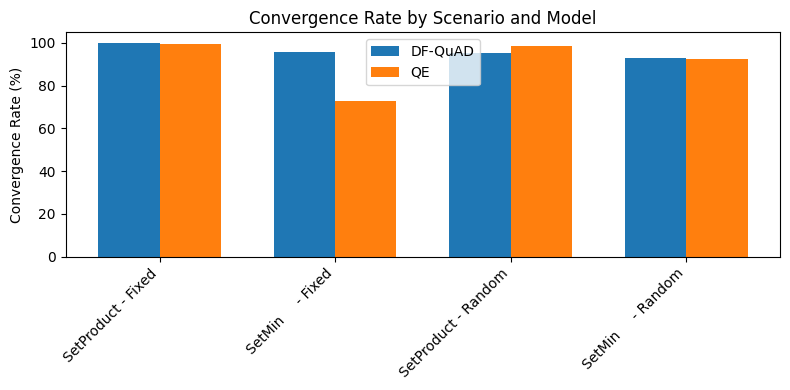

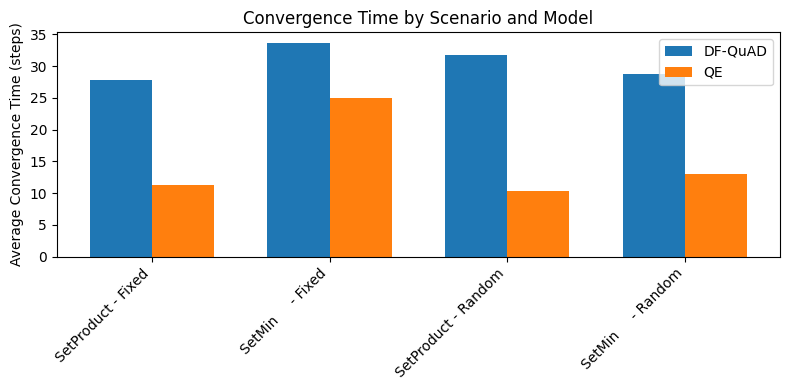

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Define the four scenarios and their corresponding pickle files
scenarios = {
    "SetProduct - Fixed":    "../convergence_results_to10m_nf_atm_e2_d5_s5000_prod.pkl",
    "SetMin     - Fixed":    "../convergence_results_to10m_nf_atm_e2_d5_s5000_min.pkl",
    "SetProduct - Random":   "../convergence_results_to10m_nf_atm_e2_d5_s5000_randinitall_prod.pkl",
    "SetMin     - Random":   "../convergence_results_to10m_nf_atm_e2_d5_s5000_randinitall_min.pkl",
}

models = ["DF-QuAD", "QE"]

# Prepare containers
rates = {model: [] for model in models}
times = {model: [] for model in models}
labels = list(scenarios.keys())

# Extract metrics for each scenario & model
for label, path in scenarios.items():
    runs = pickle.load(open(path, "rb"))
    good = [r for r in runs if not r.get("timeout", False)]
    for model in models:
        model_runs = [r for r in good if r["model"] == model]
        # Convergence rate
        conv_rate = sum(1 for r in model_runs if r["global_converged"]) / len(model_runs)
        rates[model].append(conv_rate * 100)  # convert to percent
        # Average convergence time
        ct_vals = []
        for r in model_runs:
            ct = r["convergence_time"]
            if isinstance(ct, dict):
                vals = [v for v in ct.values() if v is not None]
                if vals:
                    ct_vals.append(np.mean(vals))
            elif isinstance(ct, (int, float)):
                ct_vals.append(ct)
        times[model].append(np.mean(ct_vals))

# Plot convergence rates
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 4))
for i, model in enumerate(models):
    ax.bar(x + i*width, rates[model], width, label=model)
ax.set_xticks(x + width/2)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel("Convergence Rate (%)")
ax.set_title("Convergence Rate by Scenario and Model")
ax.legend()
plt.tight_layout()
plt.show()

# Plot convergence times
fig, ax = plt.subplots(figsize=(8, 4))
for i, model in enumerate(models):
    ax.bar(x + i*width, times[model], width, label=model)
ax.set_xticks(x + width/2)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel("Average Convergence Time (steps)")
ax.set_title("Convergence Time by Scenario and Model")
ax.legend()
plt.tight_layout()
plt.show()


/vol/bitbucket/fr920/envs/gradaba/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/vol/bitbucket/fr920/envs/gradaba/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/vol/bitbucket/fr920/envs/gradaba/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/vol/bitbucket/fr920/envs/gradaba/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/vol/bitbucket/fr920/envs/gradaba/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/vol/bitbucket/fr920/envs/gradaba/lib/python3.10/site-packages/numpy/_co

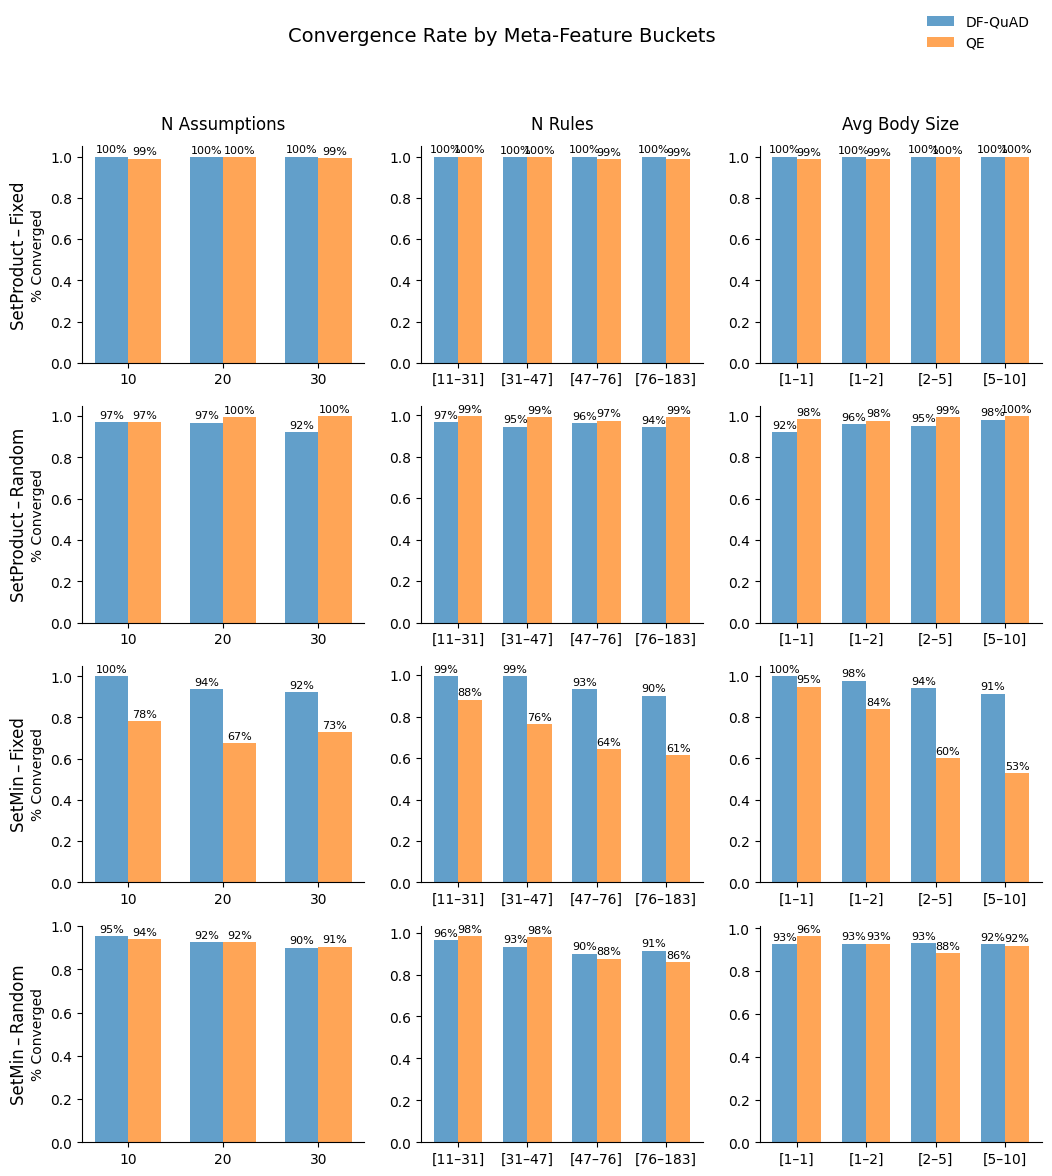

/tmp/ipykernel_4097874/2680690037.py:85: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(sub[bucket_col]):
/tmp/ipykernel_4097874/2680690037.py:98: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  piv = grp.unstack("model").fillna(0)
/tmp/ipykernel_4097874/2680690037.py:85: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(sub[bucket_col]):
/tmp/ipykernel_4097874/2680690037.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass ob

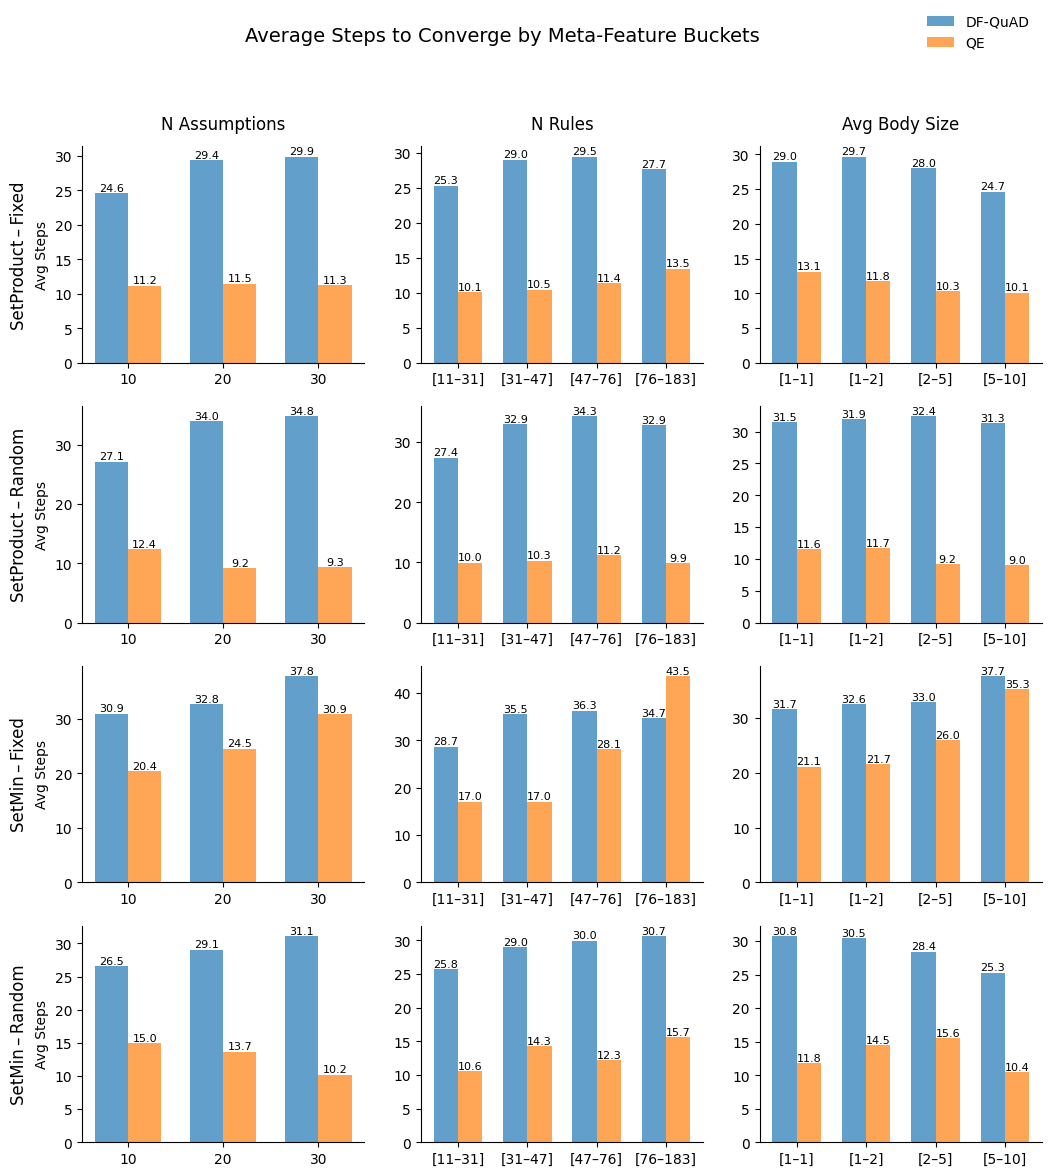

In [6]:
import pickle
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ── CONFIG ────────────────────────────────────────────────────────────────
ABA_FOLDER = Path("../data_generation/abaf/")
SCENARIOS = [
    ("SetProduct – Fixed",  "../convergence_results_to10m_nf_atm_e2_d5_s5000_prod.pkl"),
    ("SetProduct – Random", "../convergence_results_to10m_nf_atm_e2_d5_s5000_randinitall_prod.pkl"),
    ("SetMin – Fixed",      "../convergence_results_to10m_nf_atm_e2_d5_s5000_min.pkl"),
    ("SetMin – Random",     "../convergence_results_to10m_nf_atm_e2_d5_s5000_randinitall_min.pkl"),
]
META_COLS = ["num_assumptions_file", "num_rules_file", "avg_body_size_file"]
COL_DISPLAY = {
    "num_assumptions_file": "N Assumptions",
    "num_rules_file":       "N Rules",
    "avg_body_size_file":   "Avg Body Size"
}
Q = 4
# ────────────────────────────────────────────────────────────────────────────

def build_file_meta(folder):
    rec = {}
    for p in sorted(folder.glob("*.aba")):
        lines   = p.read_text().splitlines()
        assumps = [ln for ln in lines if ln.startswith("a ")]
        rules   = [ln for ln in lines if ln.startswith("r ")]
        bodies  = [ln.split()[2:] for ln in rules]
        rec[p.stem] = {
            "num_assumptions_file": len(assumps),
            "num_rules_file":       len(rules),
            "avg_body_size_file":   (sum(len(b) for b in bodies)/len(bodies)) if bodies else 0.0,
        }
    return pd.DataFrame.from_dict(rec, orient="index")

# load metadata once
meta = build_file_meta(ABA_FOLDER)

# collect all scenarios
frames = []
for label, pkl in SCENARIOS:
    runs = pickle.load(open(pkl, "rb"))
    df   = pd.DataFrame(runs)
    df   = df[df["timeout"] == False].copy()
    df["stem"] = df["file"].str.replace(r"\.aba$","",regex=True)
    df = df.merge(meta, left_on="stem", right_index=True, how="left")
    df["conv_time_avg"] = df["convergence_time"].map(
        lambda x: np.mean([v for v in x.values() if v is not None]) if isinstance(x, dict) else x
    )
    df["scenario"] = label
    frames.append(df)
all_df = pd.concat(frames, ignore_index=True)

# build buckets with fall-back to raw when too few uniques
for col in META_COLS:
    n_unique = all_df[col].nunique()
    bucket_col = col + "_bucket"
    if n_unique <= Q:
        all_df[bucket_col] = all_df[col].astype(str)
    else:
        all_df[bucket_col] = pd.qcut(all_df[col], q=min(Q, n_unique), duplicates="drop")

# ── plotting helper ────────────────────────────────────────────────────────
def plot_metric(metric, title, ylabel, fmt_tick):
    n_row, n_col = len(SCENARIOS), len(META_COLS)
    fig, axes = plt.subplots(n_row, n_col,
                             figsize=(4*n_col, 3*n_row),
                             sharey=False)
    # leave extra room on the left for row labels, and on top for legend
    fig.subplots_adjust(left=0.15, right=0.95, top=0.88, bottom=0.05)

    # we'll grab these once for the legend
    legend_handles, legend_labels = None, None

    for i, (scenario, _) in enumerate(SCENARIOS):
        sub = all_df[all_df["scenario"] == scenario]

        for j, col in enumerate(META_COLS):
            ax = axes[i][j]
            bucket_col = col + "_bucket"

            # order categories/values
            if pd.api.types.is_categorical_dtype(sub[bucket_col]):
                cats = sub[bucket_col].cat.categories
                labels_x = [f"[{int(iv.left)}–{int(iv.right)}]" for iv in cats]
            else:
                cats = sorted(sub[bucket_col].unique())
                labels_x = [str(c) for c in cats]

            # group & pivot
            grp = (sub
                   .groupby([bucket_col, "model"])
                   .agg(runs          = ("timeout","count"),
                        n_converged   = ("global_converged","sum"),
                        conv_time_avg = ("conv_time_avg","mean")))
            piv = grp.unstack("model").fillna(0)

            # pick metric
            if metric == "rate":
                vals = (piv["n_converged"] / piv["runs"]).reindex(cats)
            else:
                vals = piv["conv_time_avg"].reindex(cats)

            qad = vals["DF-QuAD"].values
            qe  = vals["QE"].values

            x = np.arange(len(cats))
            w = 0.35
            b1 = ax.bar(x - w/2, qad, w, label="DF-QuAD", alpha=0.7)
            b2 = ax.bar(x + w/2, qe,  w, label="QE",      alpha=0.7)

            # annotate
            for xi in x:
                ax.text(xi - w/2, qad[xi] + 0.01, fmt_tick(qad[xi]),
                        ha="center", va="bottom", fontsize=8)
                ax.text(xi + w/2, qe[xi]  + 0.01, fmt_tick(qe[xi]),
                        ha="center", va="bottom", fontsize=8)

            # x‐labels
            ax.set_xticks(x)
            ax.set_xticklabels(labels_x)#, rotation=0, ha="right")
            # hide top & right spines
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            # only top row gets the column title
            if i == 0:
                ax.set_title(COL_DISPLAY[col], pad=12)

            # only first column gets y‐axis label
            if j == 0:
                ax.set_ylabel(ylabel)

            # capture legend handles once
            if legend_handles is None and i == 0 and j == n_col-1:
                legend_handles = [b1, b2]
                legend_labels  = ["DF-QuAD","QE"]

        # add one row label on the left margin
        y0 = axes[i][0].get_position().y0
        y1 = axes[i][0].get_position().y1
        fig.text(0.09, (y0+y1)/2, scenario,
                 va="center", ha="left", rotation=90, fontsize=12)

    # place single legend up near the top
    fig.legend(legend_handles, legend_labels,
               loc="upper right",
               bbox_to_anchor=(0.95, 1),
               frameon=False)

    # main suptitle
    fig.suptitle(title, y=0.98, fontsize=14)
    plt.show()


# ── draw the two plots ─────────────────────────────────────────────────────
plot_metric(
    metric="rate",
    title="Convergence Rate by Meta-Feature Buckets",
    ylabel="% Converged",
    fmt_tick=lambda v: f"{100*v:.0f}%"
)

plot_metric(
    metric="time",
    title="Average Steps to Converge by Meta-Feature Buckets",
    ylabel="Avg Steps",
    fmt_tick=lambda v: f"{v:.1f}"
)


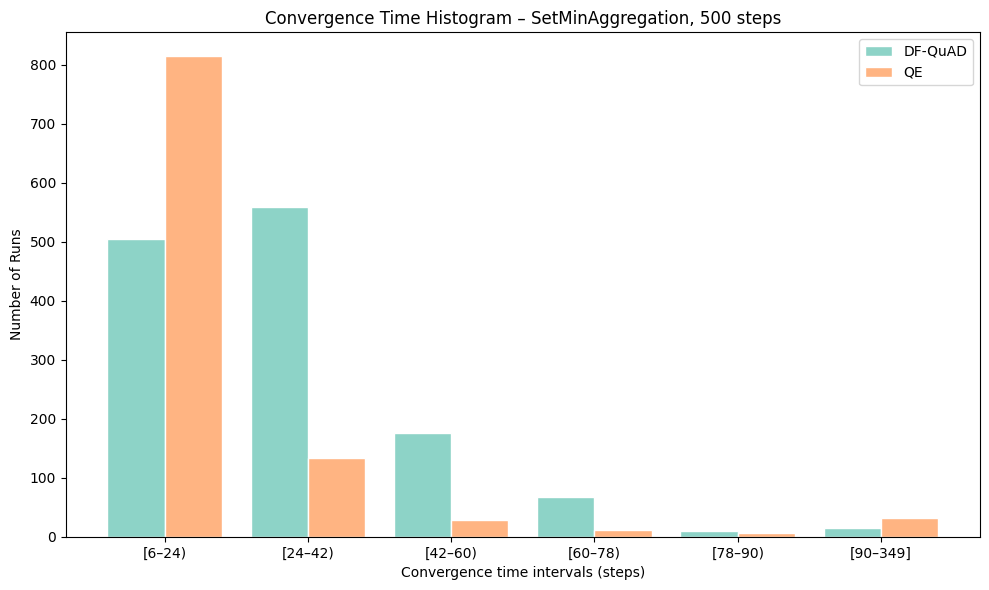

In [11]:
import pickle
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

def plot_convergence_histogram_grouped_fixed_width(
    RESULTS_PKL,
    main_title="Convergence Time Histogram",
    cutoff=106,
    n_bins=20
):
    # 1) load & filter
    with open(RESULTS_PKL, "rb") as pf:
        runs = pickle.load(pf)
    good = [r for r in runs if not r.get("timeout", False)]

    # 2) extract per‐run avg convergence time
    conv = defaultdict(list)
    for r in good:
        ct = r.get("convergence_time")
        if isinstance(ct, dict):
            vals = [v for v in ct.values() if v is not None]
            if vals:
                conv[r["model"]].append(sum(vals)/len(vals))
        elif isinstance(ct, (int, float)):
            conv[r["model"]].append(ct)

    df_times = conv["DF-QuAD"]
    qe_times = conv["QE"]

    # 3) determine raw bin‐edges & then clamp at cutoff
    lo, hi = int(np.floor(min(df_times+qe_times))), int(np.ceil(max(df_times+qe_times)))
    raw_edges = np.linspace(lo, hi, n_bins, dtype=int)

    # keep all < cutoff, then cutoff, then hi
    edges = list(raw_edges[raw_edges < cutoff]) + [cutoff, hi]
    edges = np.unique(edges)

    # 4) get counts per bin
    df_counts, _ = np.histogram(df_times, bins=edges)
    qe_counts, _ = np.histogram(qe_times, bins=edges)

    # 5) build labels
    labels = []
    for left, right in zip(edges[:-1], edges[1:]):
        if left >= cutoff:
            labels.append(f"[{left}–{right}]")
        else:
            labels.append(f"[{left}–{right})")

    # 6) set up positions
    idx = np.arange(len(labels))
    width = 0.4

    # 7) choose softer colors
    teal = "#8dd3c7"
    orange = "#ffb482"

    # 8) plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(idx - width/2, df_counts, width,
           label="DF-QuAD", color=teal, alpha=1, edgecolor="white")
    ax.bar(idx + width/2, qe_counts, width,
           label="QE",      color=orange, alpha=1, edgecolor="white")

    ax.set_xticks(idx)
    ax.set_xticklabels(labels, )#rotation=45, ha="right")
    ax.set_xlabel(f"Convergence time intervals (steps)")
    ax.set_ylabel("Number of Runs")
    ax.set_title(main_title)
    ax.legend()
    fig.tight_layout()
    plt.show()

plot_convergence_histogram_grouped_fixed_width(
    "../convergence_results_to10m_nf_atm_e2_d5_s500_min.pkl",
    main_title="Convergence Time Histogram – SetMinAggregation, 500 steps",
    cutoff=90
)

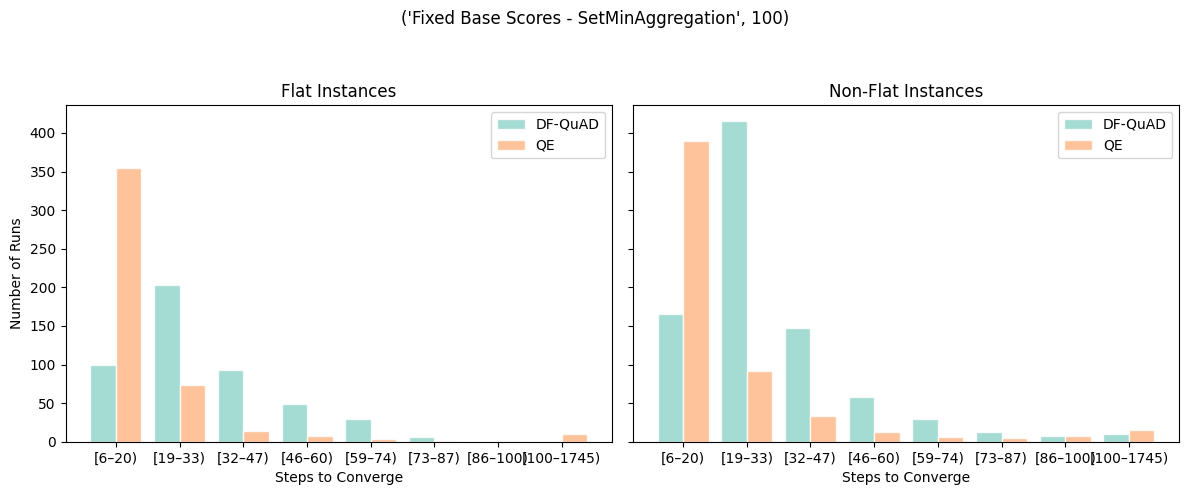

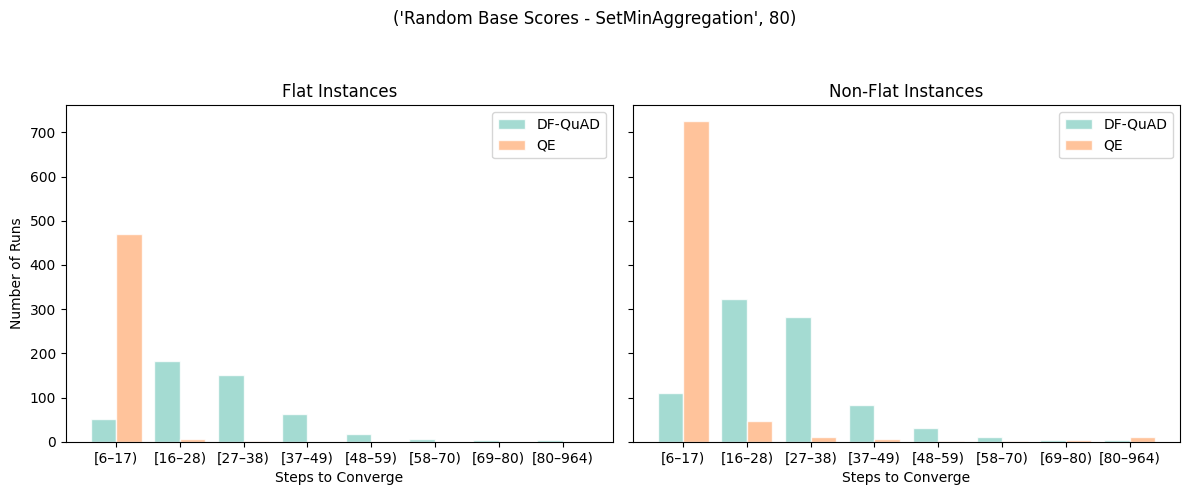

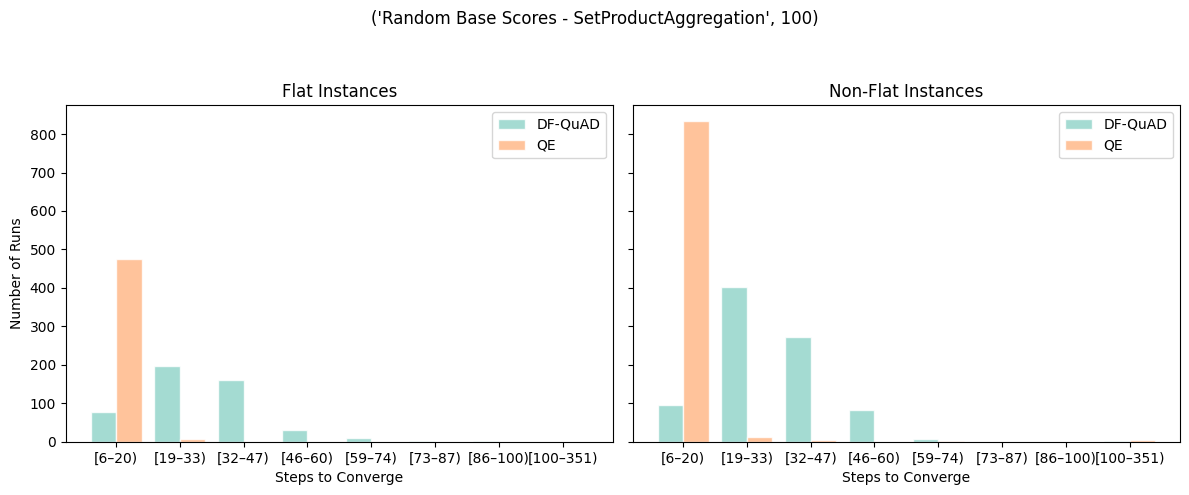

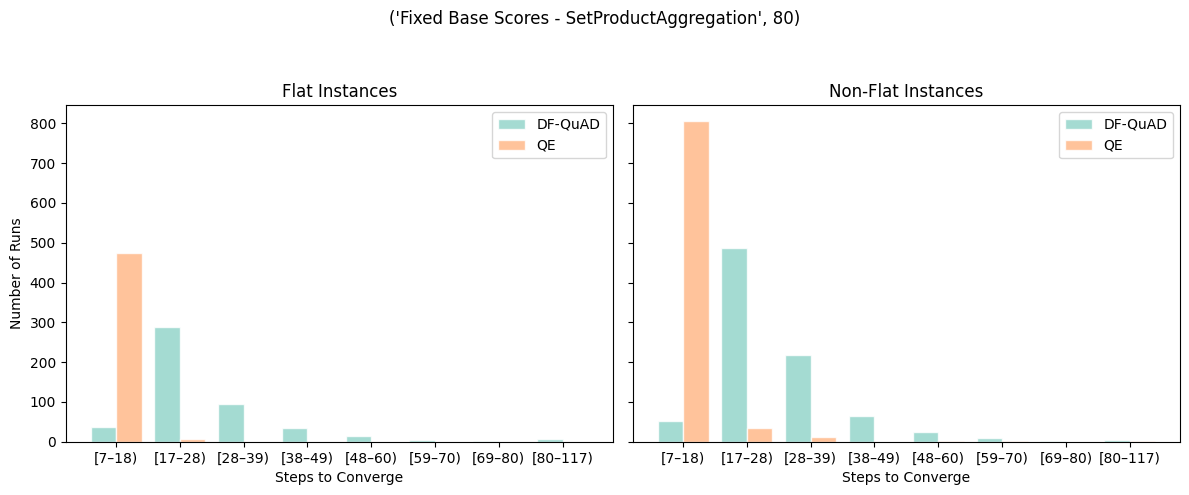

In [8]:
import pickle
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

def plot_convergence_bars_by_flatness(
    RESULTS_PKL,
    main_title="Convergence Time by Flatness",
    n_bins=10,
    cutoff=None
):
    # 1) load & filter
    with open(RESULTS_PKL, "rb") as pf:
        all_runs = pickle.load(pf)
    good = [r for r in all_runs if not r.get("timeout", False)]

    # 2) build conv times by (model, flat_flag)
    conv = defaultdict(list)
    for r in good:
        ct = r.get("convergence_time")
        if isinstance(ct, dict):
            vals = [v for v in ct.values() if v is not None]
            if not vals: continue
            avg_ct = sum(vals)/len(vals)
        elif isinstance(ct, (int,float)):
            avg_ct = ct
        else:
            continue
        flat_flag = not bool(r.get("non_flat", False))
        conv[(r["model"], flat_flag)].append(avg_ct)

    # 3) overall min/max for bins
    all_times = []
    for times in conv.values():
        all_times.extend(times)
    lo, hi = min(all_times), max(all_times)
    
    # optional grouping above cutoff
    if cutoff is None:
        edges = np.linspace(lo, hi, n_bins+1)
    else:
        edges_low = np.linspace(lo, cutoff, n_bins)
        edges = np.concatenate([edges_low, [hi]])
    edges = np.unique(edges)

    # 4) prepare labels
    labels = []
    for L, R in zip(edges[:-1], edges[1:]):
        Ls, Rs = int(np.floor(L)), int(np.ceil(R))
        labels.append(f"[{Ls}–{Rs})")

    # 5) pastel colors
    teal = "#8dd3c7"
    orange = "#ffb482"
    alpha = 0.8
    edge = "white"

    # 6) plot panels
    fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)
    for ax, flat_flag in zip(axes, [True, False]):
        # get counts
        df_ct = conv.get(("DF-QuAD", flat_flag), [])
        qe_ct = conv.get(("QE",     flat_flag), [])
        df_counts, _ = np.histogram(df_ct, bins=edges)
        qe_counts, _ = np.histogram(qe_ct, bins=edges)

        # bar positions
        idx = np.arange(len(labels))
        w = 0.4

        ax.bar(idx - w/2, df_counts, w,
               label="DF-QuAD", color=teal, alpha=alpha,
               edgecolor=edge)
        ax.bar(idx + w/2, qe_counts, w,
               label="QE",      color=orange, alpha=alpha,
               edgecolor=edge)

        ax.set_xticks(idx)
        ax.set_xticklabels(labels)#, rotation=45, ha="right")
        title = "Flat" if flat_flag else "Non-Flat"
        ax.set_title(f"{title} Instances")
        ax.set_xlabel("Steps to Converge")
        if flat_flag:
            ax.set_ylabel("Number of Runs")
        ax.legend()

    fig.suptitle(main_title)
    fig.tight_layout(rect=[0,0,1,0.93])
    plt.show()

RESULTS_PKLs = ["../convergence_results_to10m_nf_atm_e2_d5_s5000_min.pkl",
                "../convergence_results_to10m_nf_atm_e2_d5_s5000_randinitall_min.pkl",
                "../convergence_results_to10m_nf_atm_e2_d5_s5000_randinitall_prod.pkl",
                "../convergence_results_to10m_nf_atm_e2_d5_s5000_prod.pkl"
                ]

res_title_map = {
    "../convergence_results_to10m_nf_atm_e2_d5_s5000_min.pkl": ("Fixed Base Scores - SetMinAggregation", 100),
    "../convergence_results_to10m_nf_atm_e2_d5_s5000_randinitall_min.pkl": ("Random Base Scores - SetMinAggregation", 80),
    "../convergence_results_to10m_nf_atm_e2_d5_s5000_randinitall_prod.pkl": ("Random Base Scores - SetProductAggregation", 100),
    "../convergence_results_to10m_nf_atm_e2_d5_s5000_prod.pkl": ("Fixed Base Scores - SetProductAggregation", 80),
}

for res in RESULTS_PKLs:
    plot_convergence_bars_by_flatness(
        res,
        main_title=f"{res_title_map[res]}",
        n_bins=8,
        cutoff=res_title_map[res][1]
    )

In [34]:
import pickle
from collections import defaultdict

def summarise_convergence_compare(path):
    """
    Summarise convergence results from a list of runs,
    showing counts *and* percentages per flat/non-flat group.
    """

    # 1) Load merged results (must include `non_flat` / disk_non_flat flag)
    with open(path, "rb") as pf:
        runs = pickle.load(pf)

    # 2) Bucket runs by (file, model) but only for those that actually ran (timeout==False)
    by_file = defaultdict(dict)
    for r in runs:
        if r.get("timeout", False):
            continue
        by_file[r["file"]][r["model"]] = r

    # 3) Prepare counters and file‐counts
    summary = {
        "flat":    {"DF":0,   "QE":0,   "both":0,   "DF_only":0,   "QE_only":0,
                    "DF_gt_QE":0,   "QE_gt_DF":0,   "equal":0},
        "non-flat":{"DF":0,   "QE":0,   "both":0,   "DF_only":0,   "QE_only":0,
                    "DF_gt_QE":0,   "QE_gt_DF":0,   "equal":0},
    }
    filecount = {"flat": 0, "non-flat": 0}

    # 4) Sweep each file
    for fname, recs in by_file.items():
        # determine flatness label
        is_nonflat = recs.get("DF-QuAD",{}).get("non_flat", False)
        grp = "non-flat" if is_nonflat else "flat"
        filecount[grp] += 1

        df = recs.get("DF-QuAD")
        qe = recs.get("QE")
        df_conv = bool(df and df.get("global_converged"))
        qe_conv = bool(qe and qe.get("global_converged"))
        df_prop = df.get("prop_converged", 0) if df else 0
        qe_prop = qe.get("prop_converged", 0) if qe else 0

        # tally simple converge counts
        if df_conv:              summary[grp]["DF"]       += 1
        if qe_conv:              summary[grp]["QE"]       += 1
        if df_conv and qe_conv:  summary[grp]["both"]     += 1
        if df_conv and not qe_conv: summary[grp]["DF_only"] += 1
        if qe_conv and not df_conv: summary[grp]["QE_only"] += 1

        # compare proportions
        if df_prop > qe_prop:    summary[grp]["DF_gt_QE"] += 1
        elif qe_prop > df_prop:  summary[grp]["QE_gt_DF"] += 1
        else:                    summary[grp]["equal"]    += 1

    # 5) Print it out with fractions + percentages
    def line(label, count, total):
        pct = (count/total*100) if total else 0
        return f"{label}: {count}/{total} ({pct:.1f}%)"

    for grp in ("flat","non-flat"):
        D = summary[grp]
        tot = filecount[grp]
        print(f"\n=== {grp.upper()} INSTANCES ({tot} files) ===")
        print(line("DF-QuAD converged",    D["DF"],     tot))
        print(line("QE converged",         D["QE"],     tot))
        print(line("Both converged",       D["both"],   tot))
        print(line("Only DF-QuAD",         D["DF_only"],tot))
        print(line("Only QE",              D["QE_only"],tot))

        print("\nAmong all these files:")
        print(line("DF-QuAD > QE prop",    D["DF_gt_QE"],   tot))
        print(line("QE > DF-QuAD prop",    D["QE_gt_DF"],   tot))
        print(line("prop equal",           D["equal"],      tot))

    # 6) Overall totals (summing flat + non-flat)
    overall = defaultdict(int)
    overall_files = filecount["flat"] + filecount["non-flat"]
    for grp in ("flat","non-flat"):
        for k,v in summary[grp].items():
            overall[k] += v

    print(f"\n=== OVERALL TOTALS ({overall_files} files) ===")
    print(line("DF-QuAD converged",    overall["DF"],       overall_files))
    print(line("QE converged",         overall["QE"],       overall_files))
    print(line("Both converged",       overall["both"],     overall_files))
    print(line("Only DF-QuAD",         overall["DF_only"],  overall_files))
    print(line("Only QE",              overall["QE_only"],  overall_files))
    print()
    print(line("DF-QuAD > QE prop",    overall["DF_gt_QE"],  overall_files))
    print(line("QE > DF-QuAD prop",    overall["QE_gt_DF"],  overall_files))
    print(line("prop equal",           overall["equal"],    overall_files))


# 7) Run it
print("\n======== SetProductAggregation ========")
summarise_convergence_compare("../convergence_results_to10m_nf_atm_e2_d5_s500_prod.pkl")
print("\n======== SetMinAggregation ========")
summarise_convergence_compare("../convergence_results_to10m_nf_atm_e2_d5_s500_min.pkl")
print("\n======== SetProductAggregation Random Init ========")
summarise_convergence_compare("../convergence_results_to10m_nf_atm_e2_d5_s500_randinit_prod.pkl")
print("\n======== SetMinAggregation Random Init  ========")
summarise_convergence_compare("../convergence_results_to10m_nf_atm_e2_d5_s500_randinit_min.pkl")




======== SetProductAggregation ========

=== FLAT INSTANCES (480 files) ===
DF-QuAD converged: 480/480 (100.0%)
QE converged: 480/480 (100.0%)
Both converged: 480/480 (100.0%)
Only DF-QuAD: 0/480 (0.0%)
Only QE: 0/480 (0.0%)

Among all these files:
DF-QuAD > QE prop: 0/480 (0.0%)
QE > DF-QuAD prop: 0/480 (0.0%)
prop equal: 480/480 (100.0%)

=== NON-FLAT INSTANCES (868 files) ===
DF-QuAD converged: 867/868 (99.9%)
QE converged: 859/868 (99.0%)
Both converged: 858/868 (98.8%)
Only DF-QuAD: 9/868 (1.0%)
Only QE: 1/868 (0.1%)

Among all these files:
DF-QuAD > QE prop: 9/868 (1.0%)
QE > DF-QuAD prop: 1/868 (0.1%)
prop equal: 858/868 (98.8%)

=== OVERALL TOTALS (1348 files) ===
DF-QuAD converged: 1347/1348 (99.9%)
QE converged: 1339/1348 (99.3%)
Both converged: 1338/1348 (99.3%)
Only DF-QuAD: 9/1348 (0.7%)
Only QE: 1/1348 (0.1%)

DF-QuAD > QE prop: 9/1348 (0.7%)
QE > DF-QuAD prop: 1/1348 (0.1%)
prop equal: 1338/1348 (99.3%)

======== SetMinAggregation ========

=== FLAT INSTANCES (480 files

In [19]:
import pickle
import random
from pathlib import Path
from collections import defaultdict

def get_examples_to_plot(RES_PICKLE):
    # ─── 1) Load merged results ───────────────────────────────────────────
    with open(RES_PICKLE, "rb") as pf:
        runs = pickle.load(pf)

    # ─── 2) Bucket runs by file ───────────────────────────────────────────
    by_file = defaultdict(dict)
    for r in runs:
        is_non_flat = bool(r.get("non_flat", False))
        by_file[r["file"]][r["model"]] = {
            "converged": bool(r.get("global_converged", False)),
            "prop":      r.get("prop_converged", 0.0),
            "non_flat":  is_non_flat,
            "timeout":   bool(r.get("timeout", False))
        }

    # ─── 3) Classify each file into categories ────────────────────────────
    cats = {
        "flat":     {"both": [], "DF_only": [], "QE_only": [], "neither": []},
        "nonflat":  {"both": [], "DF_only": [], "QE_only": [], "neither": []},
    }

    for fname, recs in by_file.items():
        # only consider files where we have both runs
        if "DF-QuAD" not in recs or "QE" not in recs:
            continue

        dfc = recs["DF-QuAD"]["converged"]
        qec = recs["QE"]["converged"]
        dfto = recs["DF-QuAD"]["timeout"] if "timeout" in recs["DF-QuAD"] else False
        if dfto:
            continue

        flatness = "nonflat" if recs["DF-QuAD"]["non_flat"]==True else "flat"

        if dfc and qec:
            cats[flatness]["both"].append(fname)
        elif dfc and not qec:
            cats[flatness]["DF_only"].append(fname)
        elif qec and not dfc:
            cats[flatness]["QE_only"].append(fname)
        else:
            cats[flatness]["neither"].append(fname)

    # ─── 4) Sample up to 5 from each ──────────────────────────────────────
    random.seed(42)
    for flatness in ("flat", "nonflat"):
        print(f"\n─── {flatness.upper()} INSTANCES ───")
        for cat in ("both", "DF_only", "QE_only", "neither"):
            lst = cats[flatness][cat]
            sample = random.sample(lst, min(5, len(lst)))
            print(f"{cat:8s} ({len(lst)} files): {sample}")

print("=== SetProductAggregation Fixed ===")
get_examples_to_plot("../convergence_results_to10m_nf_atm_e2_d5_s5000_prod.pkl")

print("\n=== SetMinAggregation Fixed ===")
get_examples_to_plot("../convergence_results_to10m_nf_atm_e2_d5_s5000_min.pkl")

print("\n=== SetProductAggregation Random ===")
get_examples_to_plot("../convergence_results_to10m_nf_atm_e2_d5_s5000_randinitall_prod.pkl")

print("\n=== SetMinAggregation Random ===")
get_examples_to_plot("../convergence_results_to10m_nf_atm_e2_d5_s5000_randinitall_min.pkl")






=== SetProductAggregation Fixed ===

─── FLAT INSTANCES ───
both     (480 files): ['nf_atm_s40_n0.01_a0.5_r8_b16_7.aba', 'nf_atm_s20_n0.01_a0.5_r4_b2_7.aba', 'nf_atm_s20_n0.01_a0.5_r2_b2_2.aba', 'nf_atm_s60_n0.01_a0.5_r2_b2_9.aba', 'nf_atm_s20_n0.05_a0.5_r2_b4_0.aba']
DF_only  (0 files): []
QE_only  (0 files): []
neither  (0 files): []

─── NONFLAT INSTANCES ───
both     (852 files): ['nf_atm_s40_n0.05_a0.5_r2_b2_5.aba', 'nf_atm_s20_n0.2_a0.5_r8_b8_2.aba', 'nf_atm_s20_n0.2_a0.5_r2_b4_3.aba', 'nf_atm_s60_n0.1_a0.5_r4_b8_0.aba', 'nf_atm_s20_n0.1_a0.5_r8_b4_5.aba']
DF_only  (9 files): ['nf_atm_s60_n0.2_a0.5_r8_b2_4.aba', 'nf_atm_s20_n0.2_a0.5_r4_b2_0.aba', 'nf_atm_s20_n0.2_a0.5_r8_b8_7.aba', 'nf_atm_s20_n0.2_a0.5_r8_b4_6.aba', 'nf_atm_s20_n0.1_a0.5_r8_b2_7.aba']
QE_only  (1 files): ['nf_atm_s40_n0.2_a0.5_r2_b4_3.aba']
neither  (0 files): []

=== SetMinAggregation Fixed ===

─── FLAT INSTANCES ───
both     (464 files): ['nf_atm_s40_n0.01_a0.5_r8_b2_6.aba', 'nf_atm_s20_n0.01_a0.5_r4_b2_7.ab

## Plot Fixed Init

ABAF(Assumptions=[a0,a1,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a2,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a3,a4,a5,a6,a7,a8,a9], Rules=[r1[0.5]: s0 :- a18.,r2[0.5]: s0 :- a0.,r3[0.5]: s0 :- a25.,r4[0.5]: s0 :- a26, a20.,r5[0.5]: s1 :- a4.,r6[0.5]: s2 :- a29, a22.,r7[0.5]: s2 :- a12.,r8[0.5]: s2 :- a11, a4.,r9[0.5]: s2 :- a14, a26.,r10[0.5]: s2 :- a14.,r11[0.5]: s3 :- a7, a10.,r12[0.5]: s3 :- a24, a22.,r13[0.5]: s4 :- a3.,r14[0.5]: s4 :- a2, a28.,r15[0.5]: s4 :- a14, a27.,r16[0.5]: s4 :- a5, a12.,r17[0.5]: s4 :- a11, a24.,r18[0.5]: s5 :- a18.,r19[0.5]: s5 :- a19.,r20[0.5]: s5 :- a24, a2.,r21[0.5]: s5 :- a3, a25.,r22[0.5]: s6 :- a11.,r23[0.5]: s6 :- a23.,r24[0.5]: s6 :- a2.,r25[0.5]: s6 :- a3, a23.,r26[0.5]: s6 :- a18, a5.,r27[0.5]: s6 :- a21.,r28[0.5]: s7 :- a18, a12.,r29[0.5]: s7 :- a16.,r30[0.5]: s7 :- a6.,r31[0.5]: s8 :- a2, a12.,r32[0.5]: s8 :- a5, a20.,r33[0.5]: s8 :- a24.,r34[0.5]: s8 :- a24, a17.,r35[0.5]: s9 :- a22, a12.,r36[0.5]: s9 :- a25.,r37[0.5]: s9 :- a9, a21.,r38[0.5]: s

Analysing rules: 100%|██████████| 157/157 [00:00<00:00, 3006.04it/s]


0.37s to build 10388 arguments

Support: {a0} -> a0 
Attack:  {a11,a23,a26} -> a0 
Attack:  {a11,a15,a22,a26,a28,a29,a3} -> a0 
Attack:  {a22,a28,a29,a3,a5} -> a0 
Attack:  {a11,a15,a16,a17,a22,a26,a29,a3,a5} -> a0 
Attack:  {a15,a20,a3} -> a0 
Attack:  {a11,a15,a20,a22,a26,a29,a5} -> a0 
Attack:  {a15,a17,a26,a3,a6} -> a0 
Attack:  {a15,a22,a25,a29,a3,a5} -> a0 
Attack:  {a22,a28,a29,a3} -> a0 
Attack:  {a20,a3} -> a0 
Attack:  {a11,a12,a15,a26,a29} -> a0 
Attack:  {a1,a11,a22,a26,a29,a3,a5} -> a0 
Attack:  {a18,a22,a29,a3,a5} -> a0 
Attack:  {a15,a16,a17,a22,a29,a5} -> a0 
Attack:  {a16,a17,a22,a29,a5} -> a0 
Attack:  {a11,a15,a16,a22,a24,a26,a29,a3,a5} -> a0 
Attack:  {a11,a15,a22,a24,a26,a27,a29,a3,a5} -> a0 
Attack:  {a11,a15,a17,a22,a26,a29,a3,a5,a6} -> a0 
Attack:  {a15,a18,a22,a29,a3,a5} -> a0 
Attack:  {a11,a19,a3} -> a0 
Attack:  {a15,a19,a22,a29,a5} -> a0 
Attack:  {a22,a29,a3,a5} -> a0 
Attack:  {a11,a15,a20,a22,a29,a3,a5} -> a0 
Attack:  {a11,a17,a26,a6} -> a0 
Attack:  {a

Analysing rules: 100%|██████████| 37/37 [00:00<00:00, 309141.93it/s]

0.01s to build 100 arguments

Support: {a0} -> a0 
Attack:  {a0,a10,a2} -> a0 
Support: {a1} -> a1 
Attack:  {a3} -> a1 
Attack:  {a1,a3,a9} -> a1 
Support: {a10} -> a10 
Attack:  {a12} -> a10 
Attack:  {a1,a12} -> a10 
Attack:  {a19} -> a10 
Attack:  {a18,a5,a9} -> a10 
Support: {a11} -> a11 
Attack:  {a12} -> a11 
Attack:  {a0} -> a11 
Support: {a12} -> a12 
Attack:  {a12,a14,a6} -> a12 
Attack:  {a1,a16,a7} -> a12 
Attack:  {a1,a12,a14,a6} -> a12 
Attack:  {a16,a7,a8} -> a12 
Attack:  {a14,a19,a6} -> a12 
Support: {a12} -> a13 
Support: {a1,a12} -> a13 
Support: {a19} -> a13 
Support: {a13} -> a13 
Attack:  {a0,a19,a4,a8} -> a13 
Attack:  {a0,a1,a19,a4,a7} -> a13 
Attack:  {a0,a1,a12,a4,a7} -> a13 
Attack:  {a0,a12,a4,a8} -> a13 
Attack:  {a0,a1,a12,a4,a8} -> a13 
Support: {a14} -> a14 
Attack:  {a5} -> a14 
Attack:  {a12,a2} -> a14 
Attack:  {a19,a2} -> a14 
Attack:  {a1,a12,a2} -> a14 
Support: {a10,a14,a16} -> a15 
Support: {a1,a12,a14,a18} -> a15 
Support: {a15} -> a15 
Attack: 

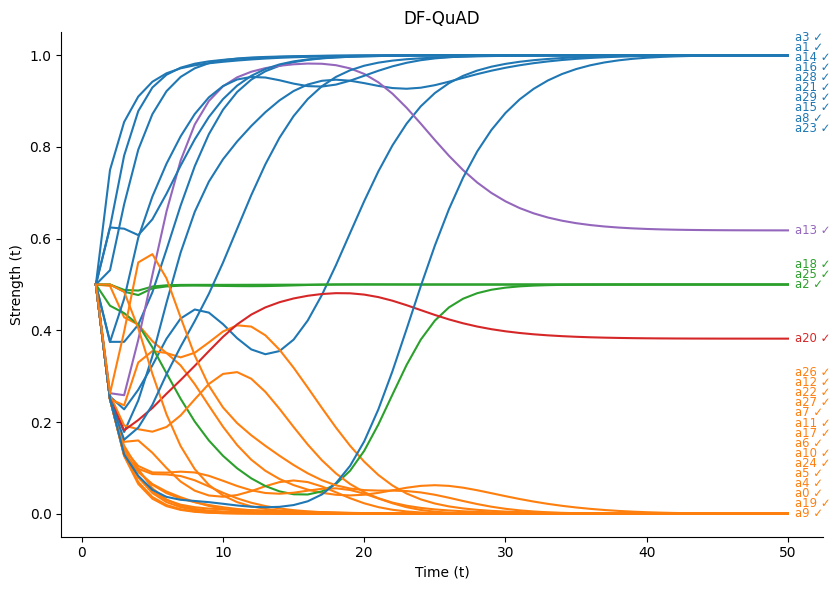

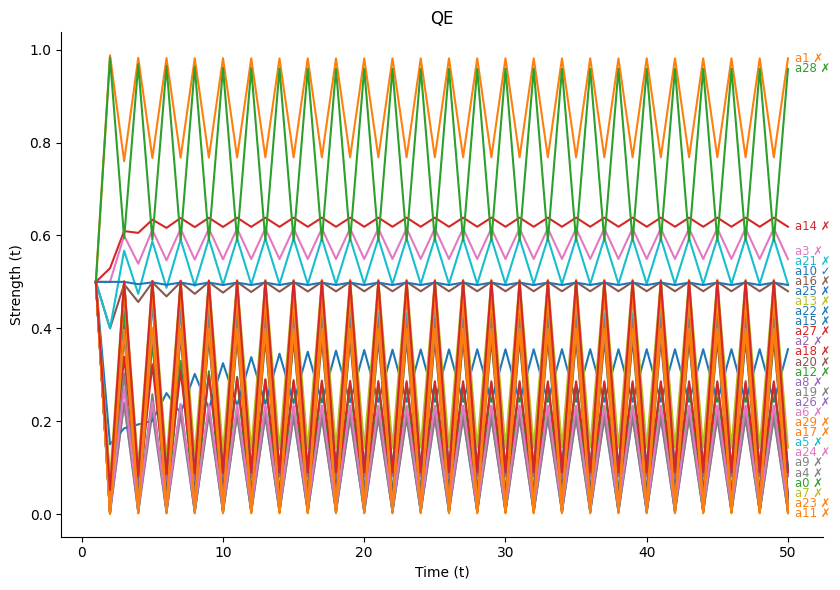

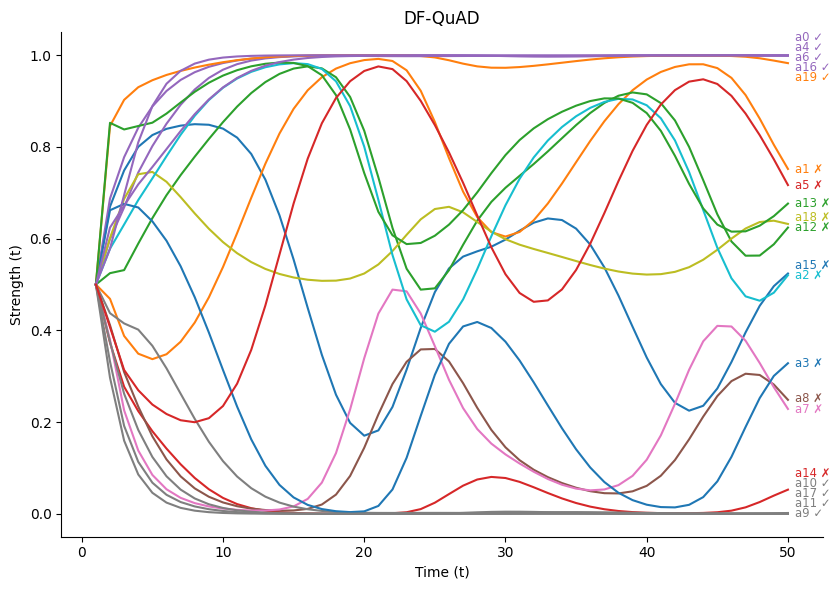

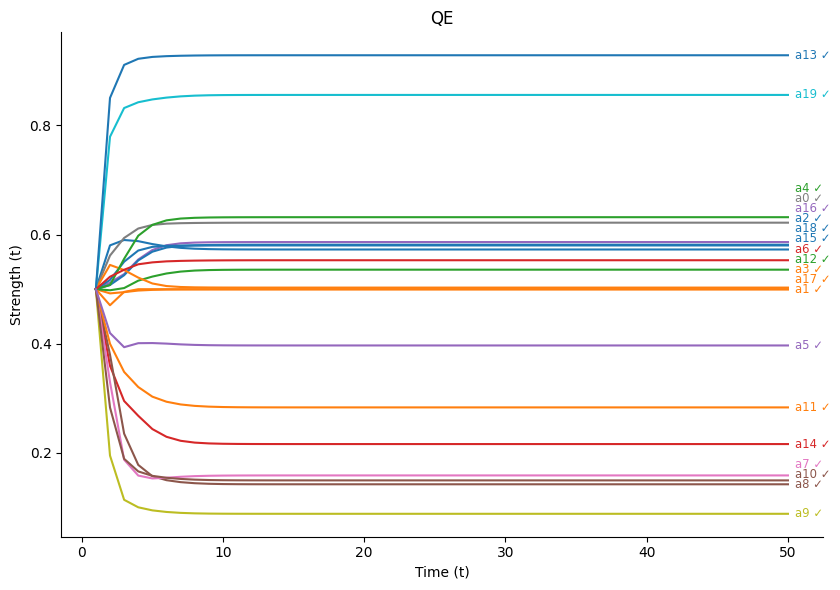

In [3]:
import sys
sys.path.append("../")

from BAG import BAG

from plotting import strengthplot

from ABAF import ABAF
from ABAF.Assumption import Assumption
from BSAF import BSAF
from BSAF.Argument import Argument
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.EulerBasedInfluence import EulerBasedInfluence
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular.SetSumAggregation import SetSumAggregation
from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence

EPSILON = 1e-2
DELTA   = 5
VERBOSE = False
TIME_STEPS = 50

### Flat
#     ## Both converge    
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s20_n0.01_a0.5_r4_b16_1.aba") 
#     ## DF-QuAD converges, QE does not
# # abaf = None
#     ## QE converges, DF-QuAD does not
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s20_n0.01_a0.5_r8_b16_4.aba")
#     ## Both do not converge
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s40_n0.01_a0.5_r8_b2_2.aba")

# ### Non-flat
#     ## Both converge
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r4_b16_9.aba")
#     ## DF-QuAD converges, QE does not
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r4_b2_0.aba") ## DF-QuAD wins
#     ## QE converges, DF-QuAD does not
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s60_n0.2_a0.5_r2_b4_7.aba")
#     ## Both do not converge
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r8_b8_7.aba") 

# paths_to_plot = [
#     ## Flat
#     ### Both converge
#     "../data_generation/abaf/nf_atm_s20_n0.01_a0.5_r4_b16_1.aba",
#     ### QE converges, DF-QuAD does not
#     "../data_generation/abaf/nf_atm_s20_n0.01_a0.5_r8_b16_4.aba",
#     ### Both do not converge
#     "../data_generation/abaf/nf_atm_s40_n0.01_a0.5_r8_b2_2.aba",
#     ## Non-flat
#     ### Both converge
#     "../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r4_b16_9.aba",
#     ### DF-QuAD converges, QE does not
#     "../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r4_b2_0.aba",
#     ### QE converges, DF-QuAD does not
#     "../data_generation/abaf/nf_atm_s60_n0.2_a0.5_r2_b4_7.aba",
#     ### Both do not converge
#     "../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r8_b8_7.aba"
# ]

paths_to_plot = [
    "../data_generation/abaf/nf_atm_s60_n0.2_a0.5_r8_b2_4.aba",
    "../data_generation/abaf/nf_atm_s40_n0.2_a0.5_r2_b4_3.aba",
]


for path in paths_to_plot:

    abaf = ABAF(path=path)

    print(abaf)
    print("Flat:", not abaf.non_flat)

    print(f"Number of Assumptions: {len(abaf.assumptions)}")
    print(f"Number of Rules: {len(abaf.rules)}")

    bsaf = abaf.to_bsaf()

    print(bsaf)

    model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(), 
                            influence=LinearInfluence(conservativeness=1), 
                            set_aggregation=SetProductAggregation())

    model.solve(TIME_STEPS, generate_plot=True, verbose=VERBOSE)

    strengthplot(model, delta=DELTA, epsilon=EPSILON,
                title="DF-QuAD", wide=10, tall=6)

    # check convergence over the last 5 iterations, with ε=1e-3
    per_arg = model.has_converged(epsilon=EPSILON, last_n=DELTA)
    print(per_arg)  
    # e.g. {'a0': True, 'a1': False, ...}
    prop_conv       = (sum(per_arg.values()) / len(per_arg)) if len(per_arg) else 0.0
    print(f"DF-QuAD - Proportion of converged assumptions: {prop_conv:.1%}")

    if model.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
        print("DF-QuAD - All assumptions have stabilized in the last 5 steps.")
    else:
        print("DF-QuAD - Some are still oscillating or drifting.")
        print(f"DF-QuAD - The assumptions that are not converged are: {[a for a, b in per_arg.items() if not b]}")


    model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(), 
                            influence=QuadraticMaximumInfluence(conservativeness=1), 
                            set_aggregation=SetProductAggregation())

    model2.solve(TIME_STEPS, generate_plot=True, verbose=VERBOSE)

    strengthplot(model2, delta=DELTA, epsilon=EPSILON,
                title="QE", wide=10, tall=6)

    # check convergence over the last 5 iterations, with ε=1e-3
    per_arg = model2.has_converged(epsilon=EPSILON, last_n=DELTA)
    print(per_arg)
    # e.g. {'a0': True, 'a1': False, ...}
    prop_conv       = (sum(per_arg.values()) / len(per_arg)) if len(per_arg) else 0.0
    print(f"QE - Proportion of converged assumptions: {prop_conv:.1%}")


    if model2.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
        print("QE - All assumptions have stabilized in the last 5 steps.")
    else:
        print("QE - Some are still oscillating or drifting.")
        print(f"QE - The assumptions that are not converged are: {[a for a, b in per_arg.items() if not b]}")


## Plot Random Init

[CACHE HIT]   nf_atm_s20_n0.1_a0.5_r8_b2_7.aba
{'a3': True, 'a4': True, 'a6': True, 'a2': True, 'a5': True, 'a0': True, 'a8': True, 'a9': True, 'a1': True, 'a7': True}
DF-QuAD - Proportion of converged assumptions: 100.0%
DF-QuAD - All assumptions have stabilized in the last 5 steps.
{'a3': False, 'a4': False, 'a6': False, 'a2': False, 'a5': False, 'a0': False, 'a8': False, 'a9': False, 'a1': False, 'a7': False}
QE - Proportion of converged assumptions: 0.0%
QE - Some are still oscillating or drifting.
QE - The assumptions that are not converged are: ['a3', 'a4', 'a6', 'a2', 'a5', 'a0', 'a8', 'a9', 'a1', 'a7']
[CACHE HIT]   nf_atm_s60_n0.05_a0.5_r8_b4_8.aba
{'a3': True, 'a11': True, 'a20': False, 'a1': True, 'a15': False, 'a18': False, 'a29': True, 'a14': False, 'a5': True, 'a13': True, 'a23': True, 'a12': True, 'a25': False, 'a7': True, 'a24': True, 'a2': False, 'a8': True, 'a22': False, 'a16': False, 'a17': True, 'a27': True, 'a4': True, 'a26': True, 'a6': True, 'a19': False, 'a10': 

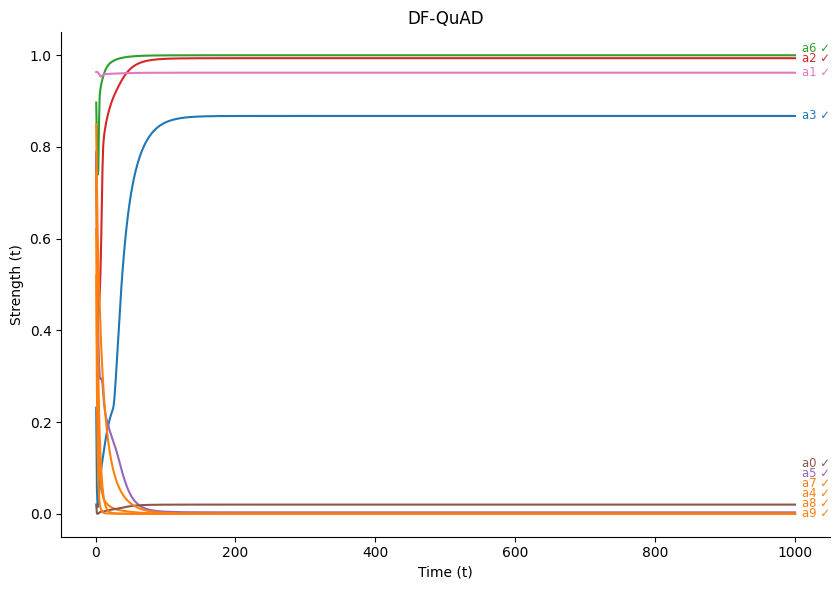

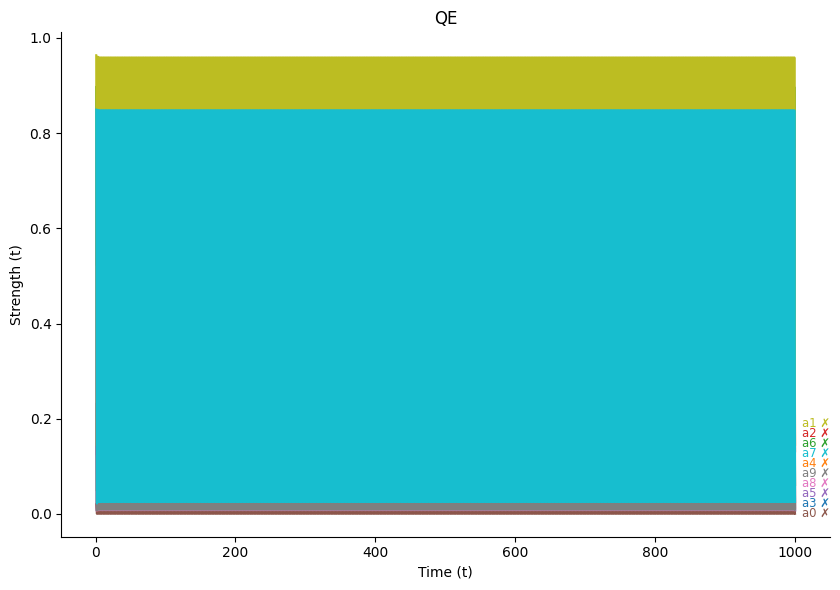

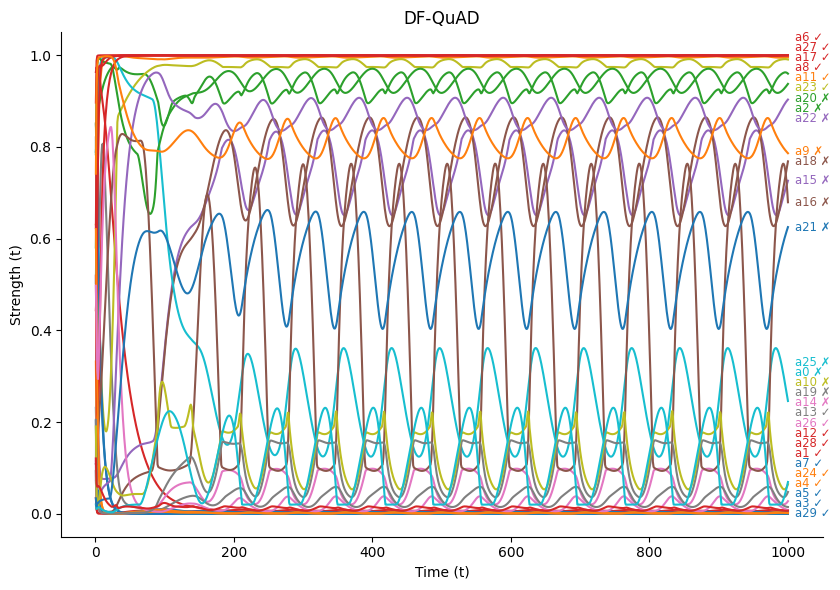

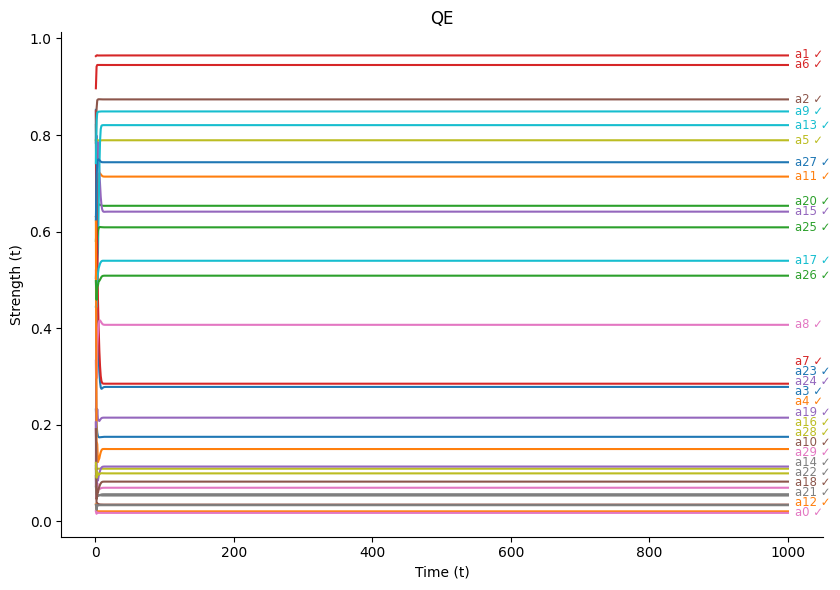

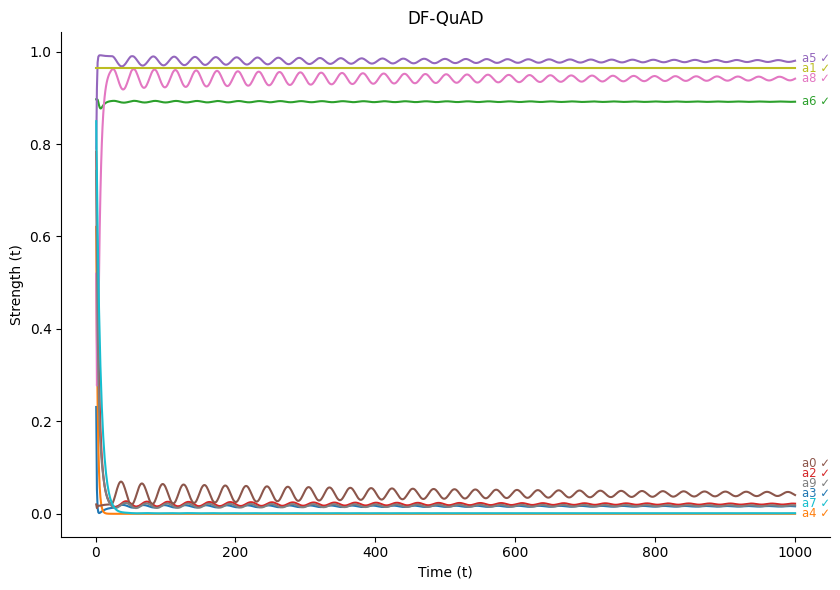

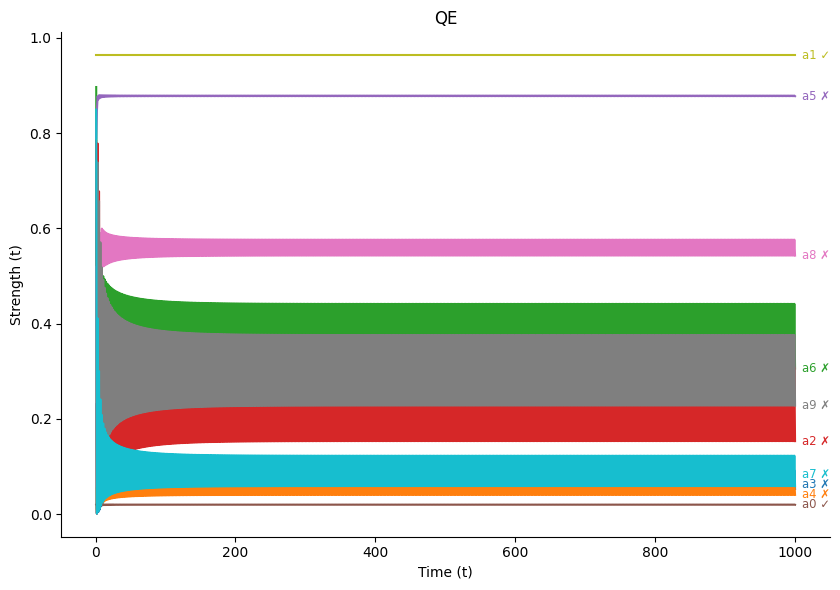

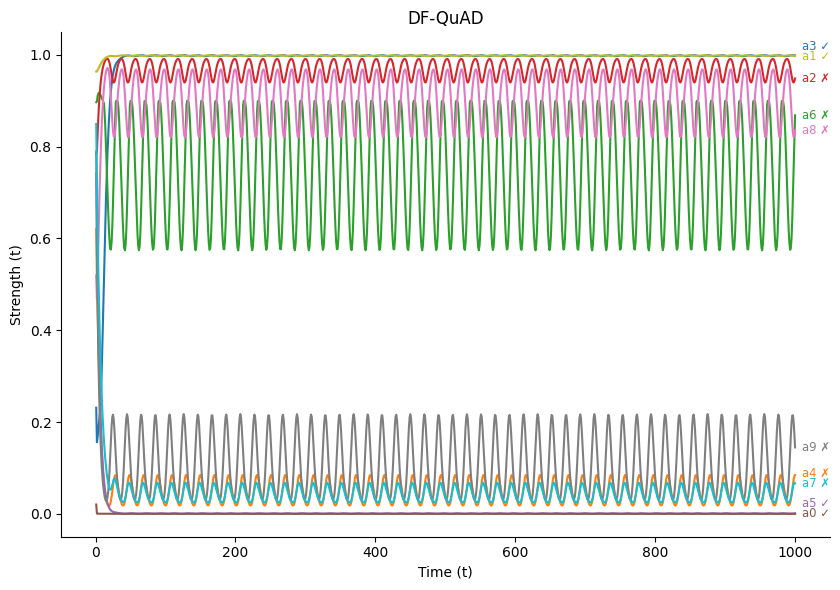

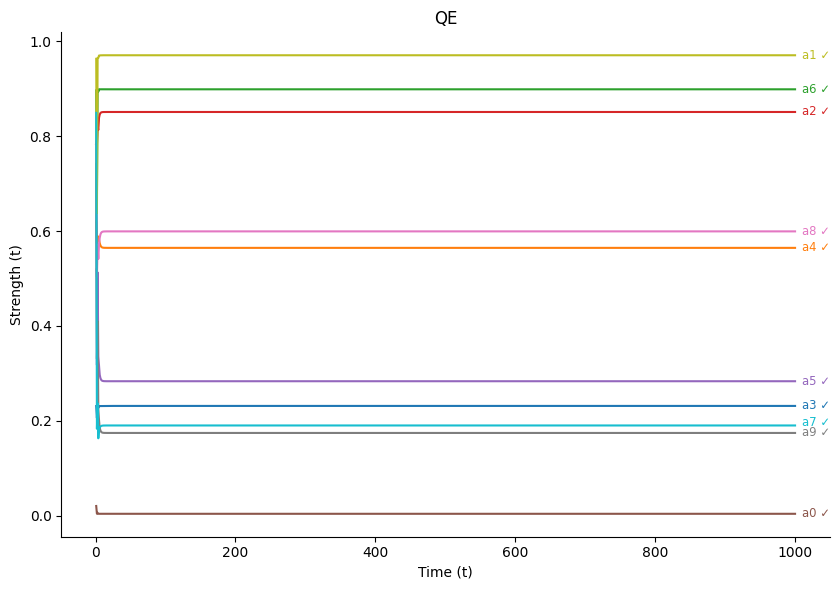

In [3]:
import sys
sys.path.append("../")
from pathlib import Path
import random
import pickle

from BAG import BAG

from plotting import strengthplot

from ABAF import ABAF
from ABAF.Assumption import Assumption
from BSAF import BSAF
from BSAF.Argument import Argument
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.EulerBasedInfluence import EulerBasedInfluence
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular.SetMinAggregation import SetMinAggregation
from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence

EPSILON = 1e-3
DELTA   = 5
VERBOSE = False
TIME_STEPS = 1000
BASE_SCORES     = 'random' # 'random' or '' (empty==DEFAULT_WEIGHTS)
CACHE_OVERRIDE  = False # set to True to override existing cache files
INPUT_DIR       = Path("../data_generation/abaf/").resolve()
CACHE_DIR       = Path(INPUT_DIR,"bsaf_frameworks")

def load_or_build_bsaf(aba_path: Path):
    """
    Caches ABAF.to_bsaf() on disk under bsaf_cache/<stem>.bsaf.pkl.
    If CACHE_OVERRIDE is True, always rebuild (even if the cache file exists).
    """
    cache_file = CACHE_DIR / (aba_path.stem + f"{BASE_SCORES}.bsaf.pkl")

    # if cache exists and we're not overriding, just load
    if cache_file.exists() and not CACHE_OVERRIDE:
        print(f"[CACHE HIT]   {aba_path.name}", flush=True)
        with open(cache_file, "rb") as f:
            return pickle.load(f)

    # otherwise we're (re)building
    if cache_file.exists() and CACHE_OVERRIDE:
        print(f"[OVERRIDE]    {aba_path.name}  (rebuilding cache)", flush=True)
    else:
        print(f"[BUILDING]    {aba_path.name}", flush=True)

    # build & cache
    abaf = ABAF(path=str(aba_path))
    bsaf = abaf.to_bsaf()
    with open(cache_file, "wb") as f:
        pickle.dump(bsaf, f)
    return bsaf

paths_to_plot = [
    "../data_generation/abaf/nf_atm_s20_n0.1_a0.5_r8_b2_7.aba", ## DF-QuAD wins
    "../data_generation/abaf/nf_atm_s60_n0.05_a0.5_r8_b4_8.aba", ## QE wins
    "../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r8_b4_4.aba", ## Neither Converges
    "../data_generation/abaf/nf_atm_s20_n0.05_a0.5_r8_b8_5.aba", ## QE wins FLAT
]

# random.seed(42)
for path in paths_to_plot:

    # abaf = ABAF(path=path, weight_fn=lambda: random.uniform(0.0, 1.0))

    # print(abaf)
    # print("Flat:", not abaf.non_flat)

    # print(f"Number of Assumptions: {len(abaf.assumptions)}")
    # print(f"Number of Rules: {len(abaf.rules)}")

    Assumption.reset_identifiers()
    Argument.reset_identifiers()

    bsaf = load_or_build_bsaf(Path(path))


    # 2) re-load ABAF only to count size-stats and update the initial strengths
    abaf = ABAF(path=str(path), 
                weight_fn=lambda: random.uniform(0.0, 1.0) if BASE_SCORES == "random" else None)
    num_assumptions = len(abaf.assumptions)
    num_rules       = len(abaf.rules)
    num_sentences   = len(abaf.sentences)

    # 3) collect initial strengths
    initial_strengths = { a.name: a.initial_weight for a in abaf.assumptions}

    ## update the initial strengths in the BSAF
    for a in bsaf.assumptions:
        if a.name in initial_strengths:
            a.initial_weight = initial_strengths[a.name]
        else:
            raise ValueError(f"Assumption {a.name} not found in initial strengths")

    # print(bsaf)

    model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(), 
                            influence=LinearInfluence(conservativeness=1), 
                            set_aggregation=SetProductAggregation()
                            # set_aggregation=SetMinAggregation()
                            )

    model.solve(TIME_STEPS, generate_plot=True, verbose=VERBOSE)

    strengthplot(model, delta=DELTA, epsilon=EPSILON,
                title="DF-QuAD", wide=10, tall=6)

    # check convergence over the last 5 iterations, with ε=1e-3
    per_arg = model.has_converged(epsilon=EPSILON, last_n=DELTA)
    print(per_arg)  
    # e.g. {'a0': True, 'a1': False, ...}
    prop_conv       = (sum(per_arg.values()) / len(per_arg)) if len(per_arg) else 0.0
    print(f"DF-QuAD - Proportion of converged assumptions: {prop_conv:.1%}")

    if model.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
        print("DF-QuAD - All assumptions have stabilized in the last 5 steps.")
    else:
        print("DF-QuAD - Some are still oscillating or drifting.")
        print(f"DF-QuAD - The assumptions that are not converged are: {[a for a, b in per_arg.items() if not b]}")


    model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(), 
                            influence=QuadraticMaximumInfluence(conservativeness=1), 
                            set_aggregation=SetProductAggregation()
                            # set_aggregation=SetMinAggregation()
                            )

    model2.solve(TIME_STEPS, generate_plot=True, verbose=VERBOSE)

    strengthplot(model2, delta=DELTA, epsilon=EPSILON,
                title="QE", wide=10, tall=6)

    # check convergence over the last 5 iterations, with ε=1e-3
    per_arg = model2.has_converged(epsilon=EPSILON, last_n=DELTA)
    print(per_arg)
    # e.g. {'a0': True, 'a1': False, ...}
    prop_conv       = (sum(per_arg.values()) / len(per_arg)) if len(per_arg) else 0.0
    print(f"QE - Proportion of converged assumptions: {prop_conv:.1%}")


    if model2.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
        print("QE - All assumptions have stabilized in the last 5 steps.")
    else:
        print("QE - Some are still oscillating or drifting.")
        print(f"QE - The assumptions that are not converged are: {[a for a, b in per_arg.items() if not b]}")


## Argument Approach

[CACHE HIT]   nf_atm_s20_n0.1_a0.5_r8_b2_7.aba
{'a9': 0.5, 'a0': 0.5, 'a5': 0.5, 'a3': 0.5, 'a6': 0.5, 'a2': 0.5, 'a8': 0.5, 'a1': 0.5, 'a4': 0.5, 'a7': 0.5}

Support: {a0} -> a0 
Attack:  {a2,a7} -> a0 
Attack:  {a5,a9} -> a0 
Attack:  {a1,a5} -> a0 
Attack:  {a0} -> a0 
Attack:  {a0,a2,a3,a5,a8} -> a0 
Attack:  {a1,a5,a8} -> a0 
Attack:  {a5} -> a0 
Attack:  {a2,a5} -> a0 
Attack:  {a1,a2,a5,a8} -> a0 
Attack:  {a2,a5,a9} -> a0 
Attack:  {a5,a8} -> a0 
Attack:  {a1,a2,a5} -> a0 
Attack:  {a0,a2,a3,a5} -> a0 
Attack:  {a2,a5,a8,a9} -> a0 
Attack:  {a9} -> a0 
Attack:  {a0,a3,a5,a8} -> a0 
Attack:  {a5,a8,a9} -> a0 
Attack:  {a8} -> a0 
Attack:  {a0,a3,a5} -> a0 
Attack:  {a2,a5,a8} -> a0 
Support: {a0,a3} -> a1 
Support: {a5} -> a1 
Support: {a0,a2,a3,a8} -> a1 
Support: {a1} -> a1 
Support: {a0,a2,a3} -> a1 
Support: {a8,a9} -> a1 
Support: {a5,a8} -> a1 
Support: {a2,a5,a8} -> a1 
Support: {a1,a2} -> a1 
Support: {a1,a8} -> a1 
Support: {a2,a9} -> a1 
Support: {a1,a2,a8} -> a1 
Supp

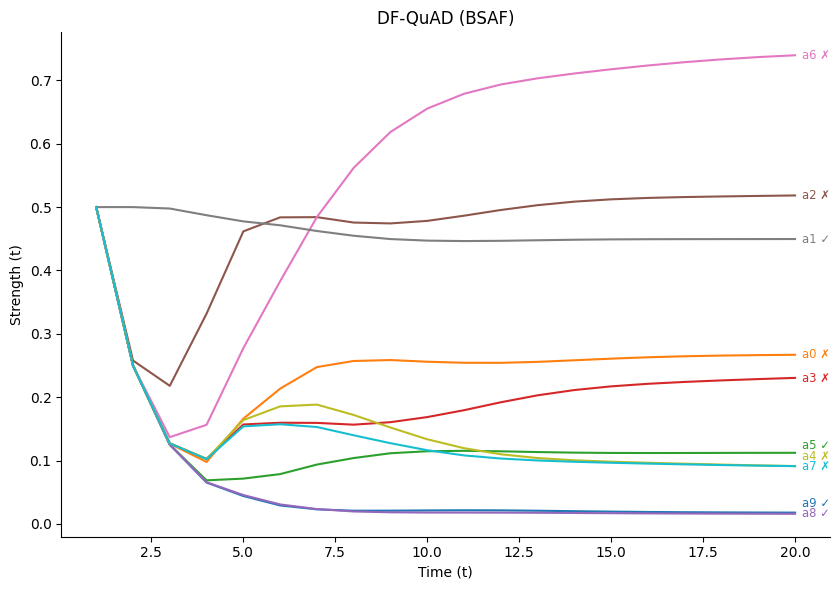

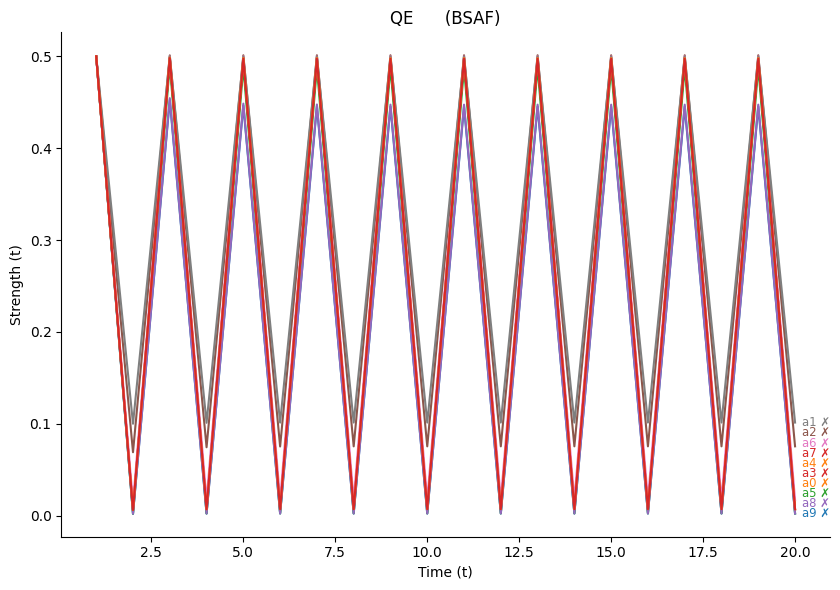

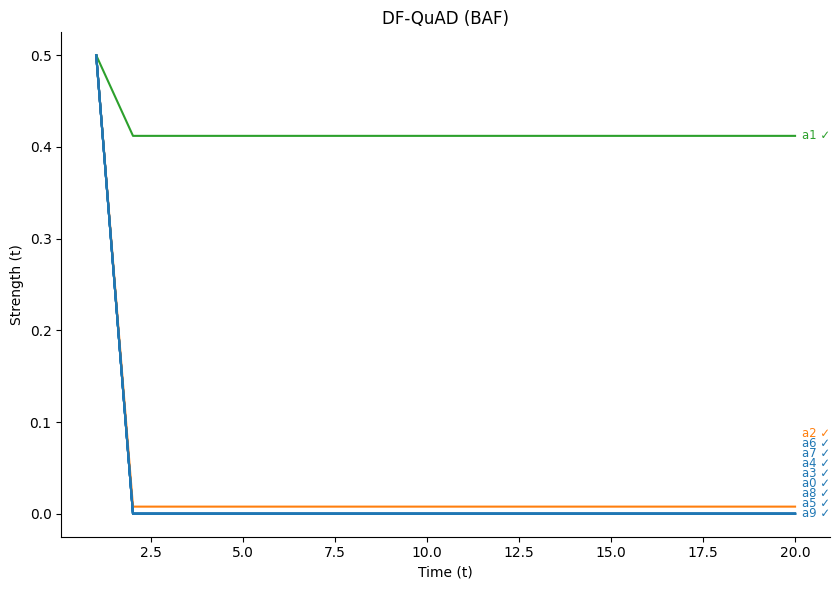

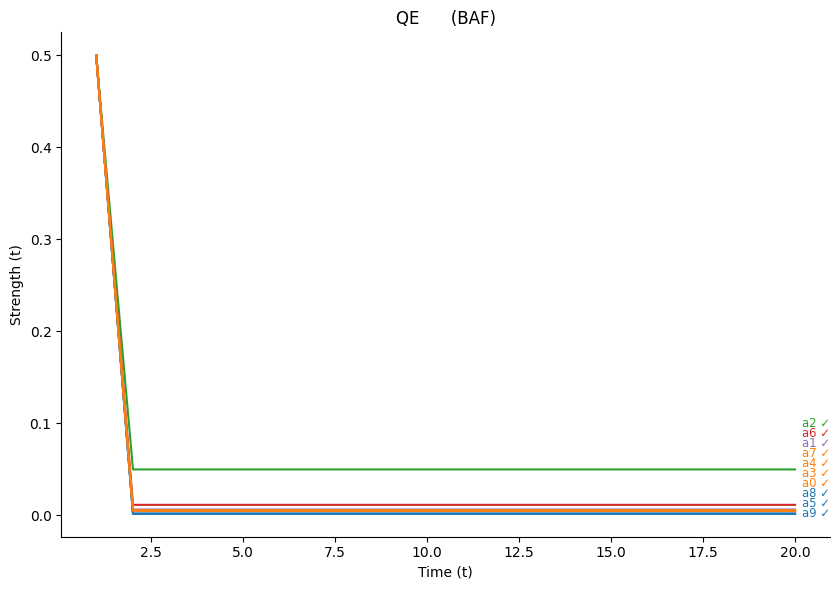

In [18]:
import sys
sys.path.append("../")
import re
from pathlib import Path
import pickle
import random

from BAG import BAG

from plotting import strengthplot

from ABAF import ABAF
from ABAF.Assumption import Assumption
from BSAF import BSAF
from BSAF.Argument import Argument
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.DiscreteModularModel import DiscreteModularBAG

from semantics.modular.EulerBasedInfluence import EulerBasedInfluence
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular.SetMinAggregation import SetMinAggregation
from semantics.modular.SetMeanAggregation import SetMeanAggregation
from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence

# ─── Config ──────────────────────────────────────────────────────────────
INPUT_DIR       = Path("../data_generation/abaf/").resolve()
CACHE_DIR       = Path(INPUT_DIR,"bsaf_frameworks")
CACHE_DIR_BAG   = Path(INPUT_DIR,"bag_frameworks")
CACHE_OVERRIDE  = False # set to True to override existing cache files
MAX_FILES       = 0       # 0 = no limit
MIN_SENTENCES   = 0
MAX_SENTENCES   = 100
BASE_SCORES     = ""
MAX_STEPS       = 20
EPSILON         = 1e-3
DELTA           = 5
SET_AGGREGATION = SetMinAggregation() # SetProductAggregation() or SetMinAggregation()
ASM_AGGREGATION = SetMeanAggregation() # SetMinAggregation() or SetMeanAggregation()
# ────────────────────────────────────────────────────────────────────────
CACHE_DIR_BAG.mkdir(exist_ok=True)

pattern_s = re.compile(r"_s(\d+)_")
all_aba   = sorted(INPUT_DIR.glob("*.aba"))
aba_paths = [
    p for p in all_aba
    if (m := pattern_s.search(p.name))
    and MIN_SENTENCES <= int(m.group(1)) <= MAX_SENTENCES
]
if MAX_FILES > 0:
    aba_paths = aba_paths[:MAX_FILES]

BSAF_RUNS = [
    ("DF-QuAD (BSAF)", dict(
        klass        = DiscreteModular,
        aggregation  = ProductAggregation(),
        influence    = LinearInfluence(conservativeness=1),
        set_aggregation = SET_AGGREGATION
    )),
    ("QE      (BSAF)", dict(
        klass        = DiscreteModular,
        aggregation  = SumAggregation(),
        influence    = QuadraticMaximumInfluence(conservativeness=1),
        set_aggregation = SET_AGGREGATION
    )),
]

BAG_RUNS = [
    ("DF-QuAD (BAF)", dict(
        klass        = DiscreteModularBAG,
        aggregation  = ProductAggregation(),
        influence    = LinearInfluence(conservativeness=1),
        set_aggregation = SET_AGGREGATION,
        ams_aggregation = ASM_AGGREGATION
    )),
    ("QE      (BAF)", dict(
        klass        = DiscreteModularBAG,
        aggregation  = SumAggregation(),
        influence    = QuadraticMaximumInfluence(conservativeness=1),
        set_aggregation = SET_AGGREGATION,
        ams_aggregation = ASM_AGGREGATION
    )),
]

ALL_RUNS = [
    *BSAF_RUNS,
    *BAG_RUNS,
]



paths_to_plot = [
    "../data_generation/abaf/nf_atm_s20_n0.1_a0.5_r8_b2_7.aba", ## DF-QuAD wins
    # "../data_generation/abaf/nf_atm_s60_n0.05_a0.5_r8_b4_8.aba", ## QE wins
    # "../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r8_b4_4.aba", ## Neither Converges
    # "../data_generation/abaf/nf_atm_s20_n0.05_a0.5_r8_b8_5.aba", ## QE wins FLAT
    # "../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r8_b4_4.aba", ## DF-QuAD only - Min
]


def load_or_build_bsaf(aba_path: Path):
    """
    Caches ABAF.to_bsaf() on disk under bsaf_cache/<stem>.bsaf.pkl.
    If CACHE_OVERRIDE is True, always rebuild (even if the cache file exists).
    """
    cache_file = CACHE_DIR / (aba_path.stem + f"{BASE_SCORES}.bsaf.pkl")

    # if cache exists and we're not overriding, just load
    if cache_file.exists() and not CACHE_OVERRIDE:
        print(f"[CACHE HIT]   {aba_path.name}", flush=True)
        with open(cache_file, "rb") as f:
            return pickle.load(f)

    # otherwise we're (re)building
    if cache_file.exists() and CACHE_OVERRIDE:
        print(f"[OVERRIDE]    {aba_path.name}  (rebuilding cache)", flush=True)
    else:
        print(f"[BUILDING]    {aba_path.name}", flush=True)

    # build & cache
    abaf = ABAF(path=str(aba_path))
    bsaf = abaf.to_bsaf()
    with open(cache_file, "wb") as f:
        pickle.dump(bsaf, f)
    return bsaf


def load_or_build_bag(aba_path: Path, weight_agg, args=None, abaf=None):
    """
    Caches ABAF.to_baf() on disk under bsaf_cache/<stem>.bsaf.pkl.
    If CACHE_OVERRIDE is True, always rebuild (even if the cache file exists).
    """

    Argument.reset_identifiers()  # reset the identifiers for the next run
    Assumption.reset_identifiers()  # reset the identifiers for the next run

    cache_file = CACHE_DIR_BAG / (aba_path.stem + f"{BASE_SCORES}{weight_agg.name}.bag.pkl")

    # if cache exists and we're not overriding, just load
    if cache_file.exists() and not CACHE_OVERRIDE:
        print(f"[CACHE HIT]   {aba_path.name}", flush=True)
        with open(cache_file, "rb") as f:
            return pickle.load(f)

    # otherwise we're (re)building
    if cache_file.exists() and CACHE_OVERRIDE:
        print(f"[OVERRIDE]    {aba_path.name}  (rebuilding cache)", flush=True)
    else:
        print(f"[BUILDING]    {aba_path.name}", flush=True)
    
    # build & cache
    if abaf is None:
        abaf = ABAF(path=str(aba_path))
    if args is None:
        bag = abaf.to_bag(weight_agg=weight_agg)
    elif args is not None and abaf is not None:
        bag = abaf.to_bag(weight_agg=weight_agg, args=args)
    else:
        raise ValueError("Either args or abaf must be provided")
    with open(cache_file, "wb") as f:
        pickle.dump(bag, f)
    return bag

for aba_path in paths_to_plot:

    # 4) for each model configuration
    for model_name, cfg in ALL_RUNS:

        Argument.reset_identifiers()  # reset the identifiers for the next run
        Assumption.reset_identifiers()  # reset the identifiers for the next run

        # 1) load or build & cache the BSAF
        bsaf = load_or_build_bsaf(Path(aba_path))

        # 2) re-load ABAF only to count size-stats and update the initial strengths
        abaf = ABAF(path=Path(aba_path), 
                    weight_fn=(lambda: random.uniform(0.0, 1.0)) if BASE_SCORES == "random" else None)
        num_assumptions = len(abaf.assumptions)
        num_rules       = len(abaf.rules)
        num_sentences   = len(abaf.sentences)

        # 3) collect initial strengths
        initial_strengths = { a.name: a.initial_weight for a in abaf.assumptions}
        print(initial_strengths)


        ## update the initial strengths in the BSAF
        for a in bsaf.assumptions:
            if a.name in initial_strengths:
                a.initial_weight = initial_strengths[a.name]
            else:
                raise ValueError(f"Assumption {a.name} not found in initial strengths")

        print(bsaf)
        # # pick the right constructor and input
        if cfg["klass"] is DiscreteModular:
            # BSAF‐based
            approach = "BSAF"
            solver = cfg["klass"](
                BSAF=bsaf,
                aggregation=cfg["aggregation"],
                influence=cfg["influence"],
                set_aggregation=cfg["set_aggregation"]
            )
            final_state = solver.solve(
                MAX_STEPS,
                generate_plot=True,
                verbose=False
            )
        else:  # BAG‐based
            approach = "BAF"
            # bag = abaf.to_bag(weight_agg=cfg["set_aggregation"], args=bsaf.arguments)
            bag = load_or_build_bag(Path(aba_path), weight_agg=cfg["set_aggregation"], args=bsaf.arguments, abaf=abaf)
            print(bag)
            solver = cfg["klass"](
                bag=bag,
                aggregation=cfg["aggregation"],
                influence=cfg["influence"],
                set_aggregation=cfg["set_aggregation"]
            )
            final_state = solver.solve(
                MAX_STEPS,
                generate_plot=True,
                verbose=True,
                view="Assumptions",
                assumptions=bsaf.assumptions,
                aggregate_strength_f=cfg["ams_aggregation"]                
            )

        ### extract final strengths for assumptions
        # asm_stregths, agg_asm_strenghts = solver.get_assumptions_strengths(set(abaf.assumptions), SetMinAggregation())
        # record final strengths & convergence
        per_arg         = solver.has_converged(epsilon=EPSILON, last_n=DELTA)
        global_conv     = solver.is_globally_converged(epsilon=EPSILON, last_n=DELTA)
        conv_time       = solver.convergence_time(epsilon=EPSILON, consecutive=DELTA, out_mean=True)
        total           = len(per_arg)
        prop_conv       = (sum(per_arg.values()) / total) if total else 0.0
        print(f"{approach} Approach ==== Model: {model_name}, Global Convergence: {global_conv}, Proportion Converged: {prop_conv}, Convergence Time: {conv_time}")

        strengthplot(solver, delta=DELTA, epsilon=EPSILON,
                    title=model_name, wide=10, tall=6)



## Aggregate Statistics for QBAF approach